<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
import pprint
with open('sat_scores.csv', mode='r') as infile:
    reader = csv.DictReader(infile)
    satscoredict = [d for d in reader]
print(satscoredict)

[{'Math': '510', 'State': 'CT', 'Rate': '82', 'Verbal': '509'}, {'Math': '513', 'State': 'NJ', 'Rate': '81', 'Verbal': '499'}, {'Math': '515', 'State': 'MA', 'Rate': '79', 'Verbal': '511'}, {'Math': '505', 'State': 'NY', 'Rate': '77', 'Verbal': '495'}, {'Math': '516', 'State': 'NH', 'Rate': '72', 'Verbal': '520'}, {'Math': '499', 'State': 'RI', 'Rate': '71', 'Verbal': '501'}, {'Math': '499', 'State': 'PA', 'Rate': '71', 'Verbal': '500'}, {'Math': '506', 'State': 'VT', 'Rate': '69', 'Verbal': '511'}, {'Math': '500', 'State': 'ME', 'Rate': '69', 'Verbal': '506'}, {'Math': '501', 'State': 'VA', 'Rate': '68', 'Verbal': '510'}, {'Math': '499', 'State': 'DE', 'Rate': '67', 'Verbal': '501'}, {'Math': '510', 'State': 'MD', 'Rate': '65', 'Verbal': '508'}, {'Math': '499', 'State': 'NC', 'Rate': '65', 'Verbal': '493'}, {'Math': '489', 'State': 'GA', 'Rate': '63', 'Verbal': '491'}, {'Math': '501', 'State': 'IN', 'Rate': '60', 'Verbal': '499'}, {'Math': '488', 'State': 'SC', 'Rate': '57', 'Verbal':

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

#### Make a DataFrame from the SAT dictionary

In [3]:
satscoredictdf = pd.DataFrame.from_dict(satscoredict)
# To re-arrange the column names just use
satscoredictdf = satscoredictdf[['State', 'Rate', 'Verbal', 'Math']]
satscoredictdf.head()

State Rate Verbal Math
0    CT   82    509  510
1    NJ   81    499  513
2    MA   79    511  515
3    NY   77    495  505
4    NH   72    520  516

In [4]:
# Since we did not convert string column values to float in the dictionary, the columns are of type object
satscoredictdf.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [5]:
# We can convert columns to type int here using the pd.to_numeric function
satscoredictdf[['Math', 'Rate', 'Verbal']] = satscoredictdf[['Math', 'Rate', 'Verbal']].apply(pd.to_numeric)
satscoredictdf.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

#### Make another DataFrame using pd.read_csv()

In [6]:
sat_df = pd.read_csv('sat_scores.csv')
sat_df.head()

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516

In [7]:
sat_df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
sat_df.shape

(52, 4)

In [9]:
sat_df.describe()
# 52 states?

Rate      Verbal        Math
count  52.000000   52.000000   52.000000
mean   37.153846  532.019231  531.500000
std    27.301788   33.236225   36.014975
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  504.000000
50%    33.500000  526.500000  521.000000
75%    63.500000  562.000000  555.750000
max    82.000000  593.000000  603.000000

In [10]:
# Looking at the Tail of the data we see an 'All' Row
sat_df.tail()

State  Rate  Verbal  Math
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551
51   All    45     506   514

In [11]:
sat_df[sat_df['State'] == 'DC']

State  Rate  Verbal  Math
16    DC    56     482   474

#### State by state in the US, the data reports the participation rate and average verbal and math scores for students taking the SAT exam. There are 52 rows which is confusing since there are 50 states, but going through the data we see there is an 'All' row that aggregates across the data and a row for the District of Columbia which is technically not a state.

In [12]:
# Does the all row capture the mean of the data?
sat_df[sat_df['State'] == 'All']

State  Rate  Verbal  Math
51   All    45     506   514

In [13]:
# Take the mean of all the state level data including DC
sat_df[:51].mean()

Rate       37.000000
Verbal    532.529412
Math      531.843137
dtype: float64

#### The 'All' row doesn't accurately capture the mean. We choose to discard it.

In [14]:
satdf = sat_df[:-1]
satdf.tail()

State  Rate  Verbal  Math
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

In [15]:
# Let's create a column for the total SAT score
satdf2 = satdf.copy()
satdf2['Total'] = satdf2['Verbal']+satdf2['Math']

In [16]:
satdf2.describe()

Rate      Verbal        Math        Total
count  51.000000   51.000000   51.000000    51.000000
mean   37.000000  532.529412  531.843137  1064.372549
std    27.550681   33.360667   36.287393    67.886069
min     4.000000  482.000000  439.000000   956.000000
25%     9.000000  501.000000  503.000000  1003.000000
50%    33.000000  527.000000  525.000000  1048.000000
75%    64.000000  562.000000  557.500000  1121.500000
max    82.000000  593.000000  603.000000  1196.000000

In [17]:
satdf2.shape

(51, 5)

## Hypothesis: States with higher levels of teen pregnancy will have fewer SAT test takers

### Import teen pregnancy data - births per 1000 girls age 15-19 in 50 States + DC
Source: https://thenationalcampaign.org/data/compare/1701

### Births per 1000 girls in the USA

In [18]:
url = 'https://thenationalcampaign.org/data/compare/1701'
tables = pd.read_html(url,header=0)
teen_moms = tables[0]
teen_moms.columns = ['Rank', 'Full Name', 'TeenBirthRate']
teen_moms.head()

Rank         Full Name  TeenBirthRate
0     1     United States           22.3
1     1  Washington, D.C.           25.6
2     1     Massachusetts            9.4
3     2       Connecticut           10.1
4     3     New Hampshire           10.9

### We only have the full name of the states and not the abbreviation. In order to join this dataframe with the SAT dataframe we need to import in another table to add State abbreviations to the teen pregnancy dataset.

In [19]:
url2 = 'http://www.50states.com/abbreviations.htm'
states_tables = pd.read_html(url2, header=0)
state_abbrev = states_tables[0]
state_abbrev.columns = ['Full Name', 'State']
state_abbrev.head()

Full Name State
0     Alabama    AL
1      Alaska    AK
2     Arizona    AZ
3    Arkansas    AR
4  California    CA

In [20]:
# Merge State abbreviation data with Teen Mom data
teen_mom_data = pd.merge(teen_moms, state_abbrev, on='Full Name', how='outer')
teen_mom_cleaned = teen_mom_data.copy()
# Add in State code for DC
teen_mom_cleaned.loc[1,'State'] = 'DC'
# Cut off the first row and everything after the 52 row
teen_mom_cleaned = teen_mom_cleaned[1:52]
#teen_mom_cleaned.set_index('State', inplace=True)
teen_mom = teen_mom_cleaned.copy()
teen_mom.head()

Rank         Full Name  TeenBirthRate State
1   1.0  Washington, D.C.           25.6    DC
2   1.0     Massachusetts            9.4    MA
3   2.0       Connecticut           10.1    CT
4   3.0     New Hampshire           10.9    NH
5   4.0           Vermont           11.6    VT

In [21]:
# Now we can join the Teen Mom table with the SAT table
sat_teen_pregnancy = pd.merge(satdf2, teen_mom, on='State', how='outer')
# Let's drop the fullname and Rank columns here
sat_teen_pregnancy.drop(['Full Name','Rank'], axis=1, inplace=True)
sat_teen_pregnancy.columns = [['State','ParticipationRate', 'Verbal', 'Math', 'Total', 'TeenBirthRate']]
sat_teen_pregnancy.head()

State  ParticipationRate  Verbal  Math  Total  TeenBirthRate
0    CT                 82     509   510   1019           10.1
1    NJ                 81     499   513   1012           12.1
2    MA                 79     511   515   1026            9.4
3    NY                 77     495   505   1000           14.6
4    NH                 72     520   516   1036           10.9

In [22]:
sat_teen_pregnancy.shape

(51, 6)

In [23]:
sat_teen_pregnancy[['ParticipationRate', 'TeenBirthRate']].corr('spearman')

ParticipationRate  TeenBirthRate
ParticipationRate           1.000000      -0.541258
TeenBirthRate              -0.541258       1.000000

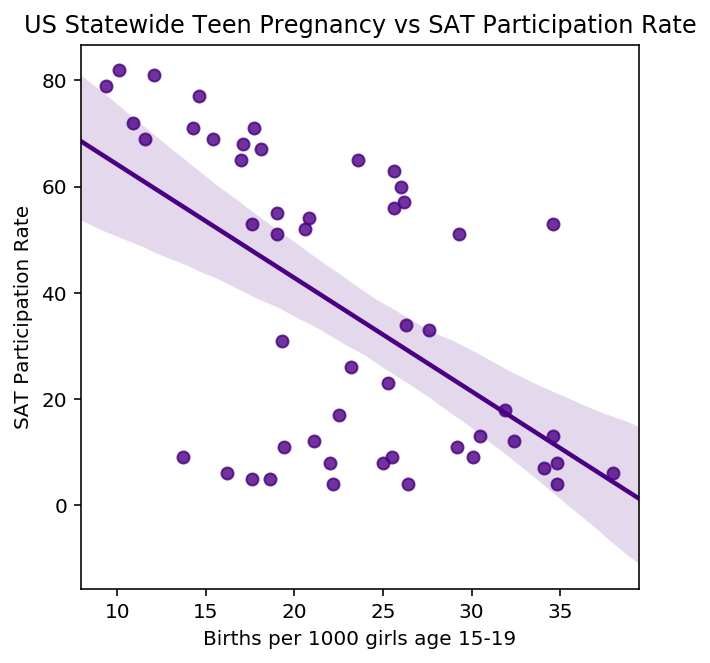

In [24]:
(fig, ax) = plt.subplots(figsize=(5,5))
ax = sns.regplot(x = 'TeenBirthRate', y='ParticipationRate', data=sat_teen_pregnancy, color='indigo', ax=ax)
ax.set(xlabel='Births per 1000 girls age 15-19', ylabel='SAT Participation Rate')
ax.set(title = 'US Statewide Teen Pregnancy vs SAT Participation Rate')
None

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [25]:
sat_teen_pregnancy_data_dict = {
    'State': {str, 'US State Abbreviation'},
    'ParticipationRate': {int, 'US state SAT exam participation rate'},
    'Verbal': {int, 'Average Verbal Score'},
    'Math': {int, 'Average Math Score'},
    'Total': {int, 'Average Verbal Score + Average Math Score'},
    'TeenBirthRate': {float, 'Births per 1000 girls age 15-19'},
    'shape': [51, 6]
}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

#### Two clusters for SAT participation rate appear. States either had really low participation or between 50-80% of students sat for the SAT.

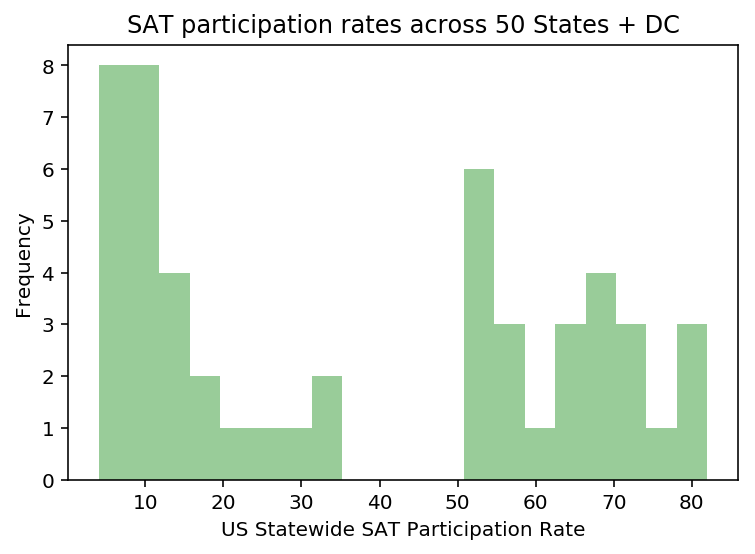

In [26]:
(fig, ax) = plt.subplots()
ax = sns.distplot(sat_teen_pregnancy['ParticipationRate'], kde=False, bins=20, color='g')
ax.set(xlabel = 'US Statewide SAT Participation Rate', ylabel='Frequency')
ax.set(title='SAT participation rates across 50 States + DC')
None

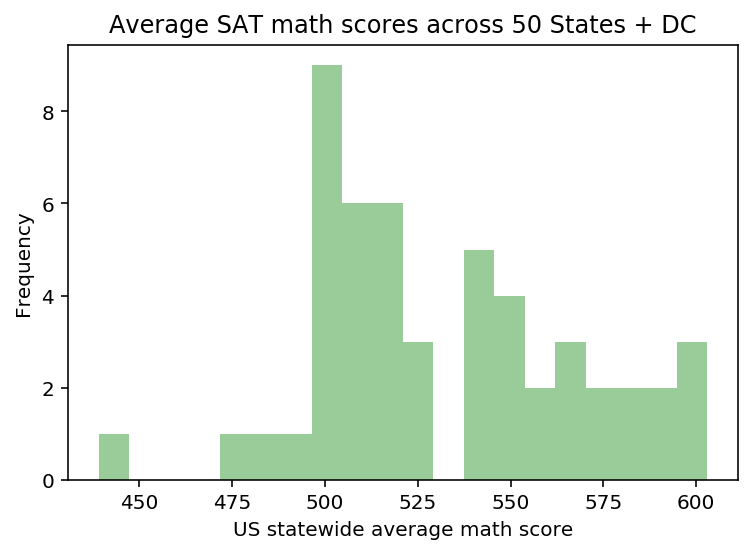

In [27]:
(fig, ax) = plt.subplots()
ax = sns.distplot(sat_teen_pregnancy['Math'], kde=False, bins=20, color='g')
ax.set(xlabel = 'US statewide average math score', ylabel='Frequency')
ax.set(title='Average SAT math scores across 50 States + DC')
None

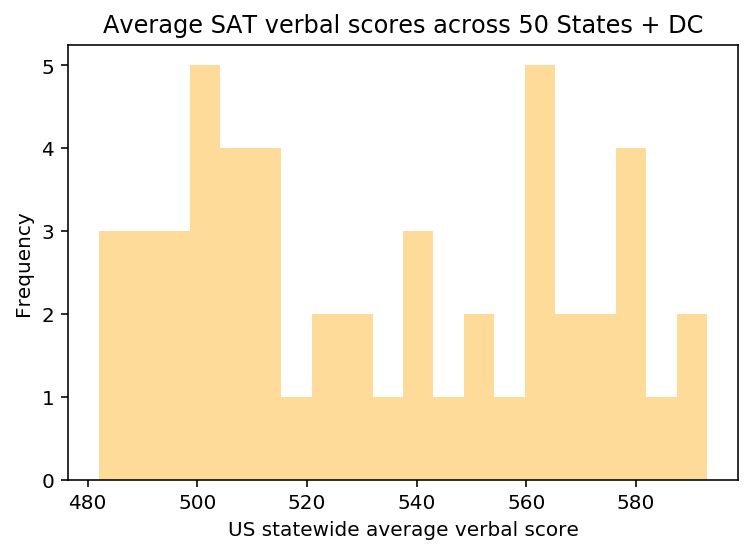

In [28]:
(fig, ax) = plt.subplots()
ax = sns.distplot(sat_teen_pregnancy['Verbal'], kde=False, bins=20, color='orange')
ax.set(xlabel = 'US statewide average verbal score', ylabel='Frequency')
ax.set(title='Average SAT verbal scores across 50 States + DC')
None

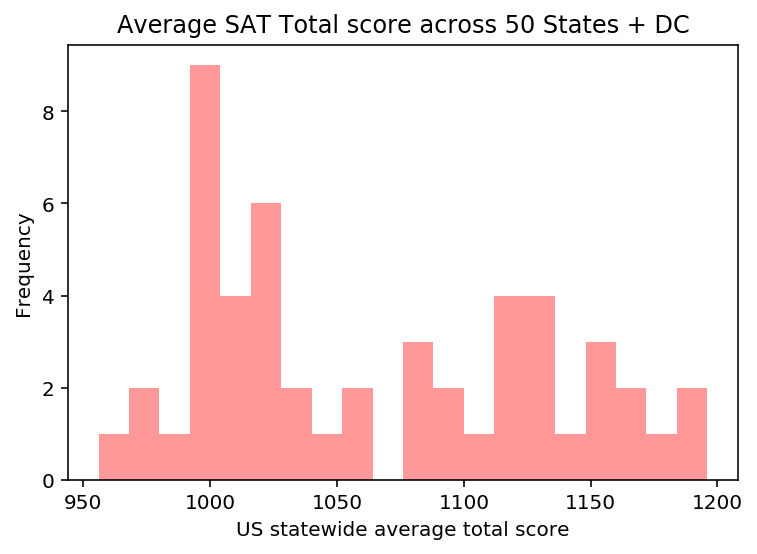

In [29]:
(fig, ax) = plt.subplots()
ax = sns.distplot(sat_teen_pregnancy['Total'], kde=False, bins=20, color='red')
ax.set(xlabel = 'US statewide average total score', ylabel='Frequency')
ax.set(title='Average SAT Total score across 50 States + DC')
None

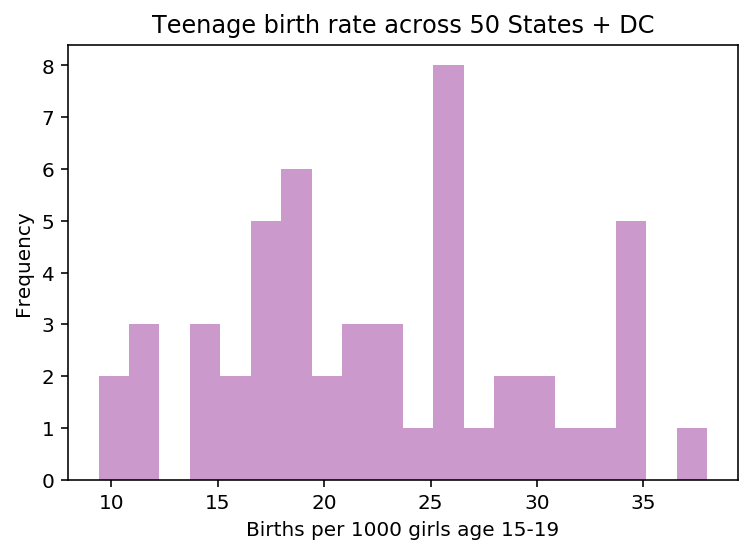

In [30]:
(fig, ax) = plt.subplots()
ax = sns.distplot(sat_teen_pregnancy['TeenBirthRate'], kde=False, bins=20, color='purple')
ax.set(xlabel = 'Births per 1000 girls age 15-19', ylabel='Frequency')
ax.set(title='Teenage birth rate across 50 States + DC')
None

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

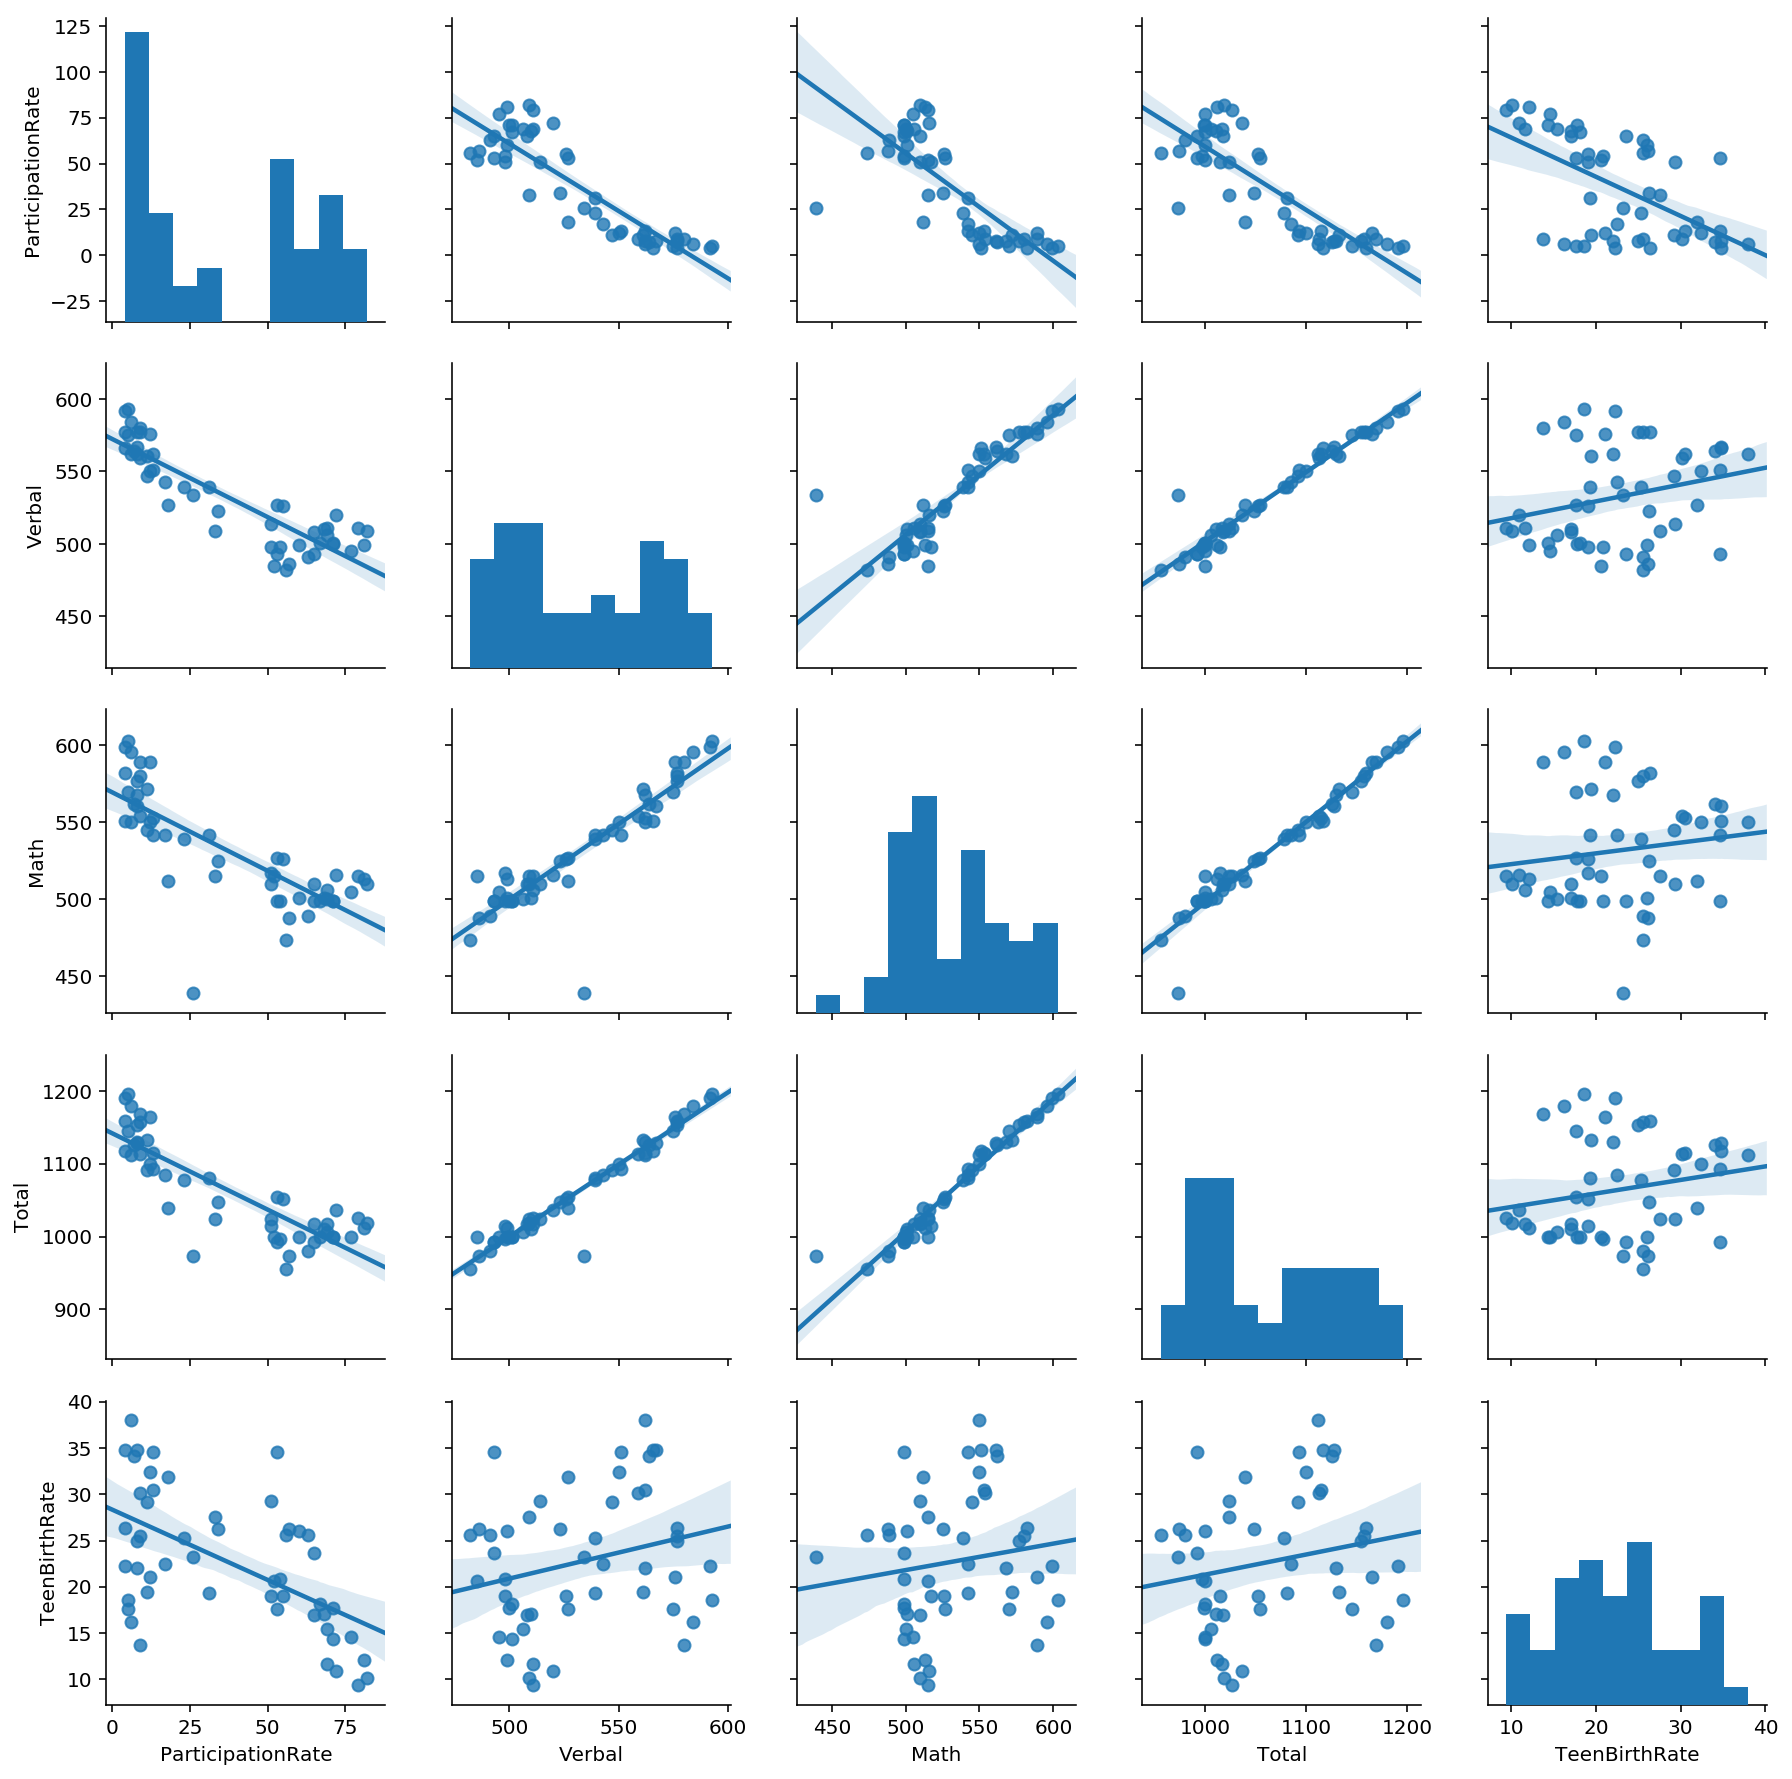

In [31]:
# Let's add Teen Pregnancy Data and Total SAT score here as well
sns.pairplot(sat_teen_pregnancy[['ParticipationRate', 'Verbal', 'Math', 'Total', 'TeenBirthRate']], kind="reg")
None

In [32]:
sat_teen_pregnancy[['ParticipationRate', 'Verbal', 'Math', 'Total', 'TeenBirthRate']].corr('spearman')

ParticipationRate    Verbal      Math     Total  \
ParticipationRate           1.000000 -0.836058 -0.811662 -0.806391   
Verbal                     -0.836058  1.000000  0.909413  0.951655   
Math                       -0.811662  0.909413  1.000000  0.983639   
Total                      -0.806391  0.951655  0.983639  1.000000   
TeenBirthRate              -0.541258  0.196587  0.147491  0.147262   

                   TeenBirthRate  
ParticipationRate      -0.541258  
Verbal                  0.196587  
Math                    0.147491  
Total                   0.147262  
TeenBirthRate           1.000000

#### Across states there is a positive correlation between SAT verbal and math scores - students with higher verbal scores tend to have higher math scores while students with lower verbal scores tend to have lower math scores. There is also a positive correlation between the SAT total score and SAT verbal and math scores. States where students have higher SAT verbal or math scores tend to have higher total scores

#### Across all states there is a negative correlation between the teen pregnancy rate and the SAT participation rates, verbal, math and total scores. States with a higher number of births per 1000 girls age 15-19 tend to have fewer students taking the SATs, and on average tend to have lower SAT verbal, math and total scores.

#### There appears to be a negative correlation between SAT participation rate and verbal scores as well as a negative correlation between SAT participation rate and math scores. States with low participation rates tend to have higher verbal and math scores compared to states with lower participation rates. There may be several explanations for this observation. States with particularly low participation rates, may be reporting results of the 'best and brightest' students who sit the SAT exams. There might be a higher teacher-student ratio in low participation states.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

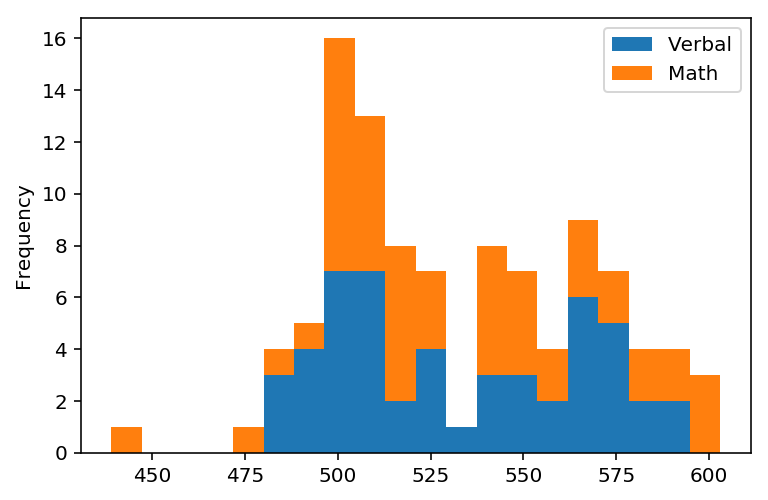

In [33]:
sat_teen_pregnancy[['Verbal', 'Math']].plot.hist(stacked=True, bins=20)
None

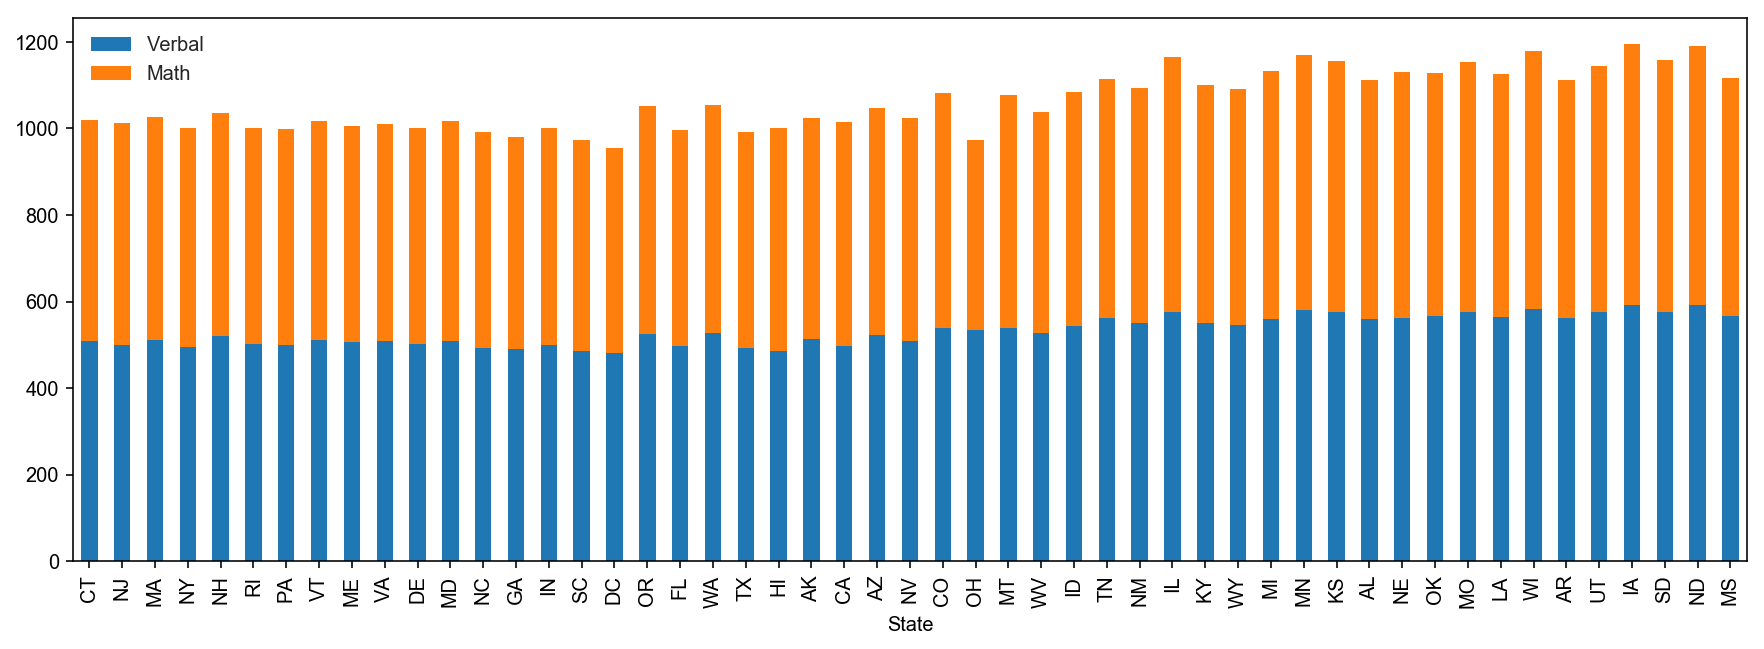

In [34]:
# Stacked bar plot shows state level performance
(fig, ax) = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sat_teen_pregnancy[['State', 'Verbal', 'Math']].plot(x = sat_teen_pregnancy.State, kind='bar', stacked=True, ax=ax)
None

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

#### Box plots represent a clean visualization of the interquartile range of a distribution and highlights any outliers in the data, clearly.

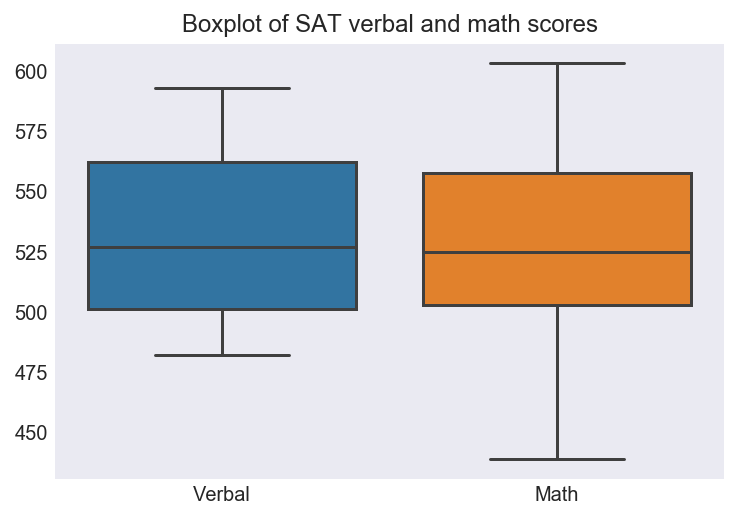

In [35]:
(fig, ax) = plt.subplots()
ax = sns.boxplot(data=sat_teen_pregnancy[['Verbal', 'Math']], ax=ax)
ax.set(title='Boxplot of SAT verbal and math scores')
None

#### (Participation) Rate is expressed as a percentage. Charting Math and Verbal which is a score out of 800 against a percentage would make the scale of the box plots incorrect.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


#### Convert Verbal and Math into a percentage out of 800 each since that is the highest possible score
Source: https://collegereadiness.collegeboard.org/about/scores/structure

In [36]:
df = sat_teen_pregnancy.copy()
df['Verbal %'] = (df['Verbal']/800)*100.0
df['Math %'] = (df['Math']/800)*100.0
df['Total %'] = (df['Total']/1600)*100.0
df['Rate %'] = df['ParticipationRate']
df.head()

State  ParticipationRate  Verbal  Math  Total  TeenBirthRate  Verbal %  \
0    CT                 82     509   510   1019           10.1    63.625   
1    NJ                 81     499   513   1012           12.1    62.375   
2    MA                 79     511   515   1026            9.4    63.875   
3    NY                 77     495   505   1000           14.6    61.875   
4    NH                 72     520   516   1036           10.9    65.000   

   Math %  Total %  Rate %  
0  63.750  63.6875      82  
1  64.125  63.2500      81  
2  64.375  64.1250      79  
3  63.125  62.5000      77  
4  64.500  64.7500      72

### While there is a large variance in the statewide participation rate, the distribution of Verbal and Math scores is much tighter. The maximum teen birth rate is around 40%

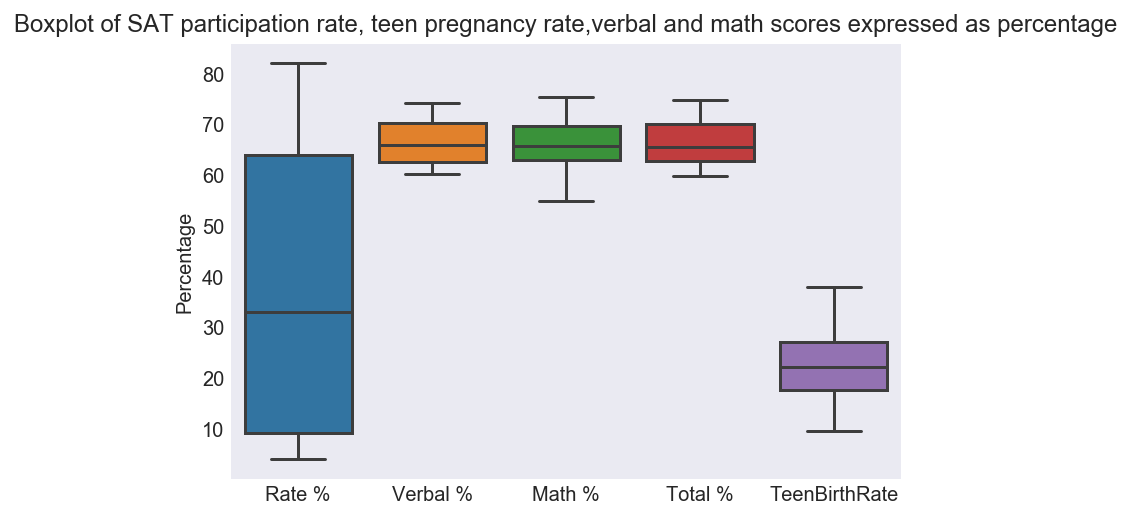

In [37]:
(fig, ax) = plt.subplots()
ax = sns.boxplot(data=df[['Rate %','Verbal %', 'Math %', 'Total %', 'TeenBirthRate']], ax=ax)
ax.set(ylabel='Percentage')
ax.set(title='Boxplot of SAT participation rate, teen pregnancy rate,verbal and math scores expressed as percentage')
None

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [38]:
# Start with the satdf
df.head()

State  ParticipationRate  Verbal  Math  Total  TeenBirthRate  Verbal %  \
0    CT                 82     509   510   1019           10.1    63.625   
1    NJ                 81     499   513   1012           12.1    62.375   
2    MA                 79     511   515   1026            9.4    63.875   
3    NY                 77     495   505   1000           14.6    61.875   
4    NH                 72     520   516   1036           10.9    65.000   

   Math %  Total %  Rate %  
0  63.750  63.6875      82  
1  64.125  63.2500      81  
2  64.375  64.1250      79  
3  63.125  62.5000      77  
4  64.500  64.7500      72

In [39]:
df.Verbal.mean()

532.52941176470586

In [40]:
# Count of states whose verbal score is above the Verbal mean
df[df.Verbal > df.Verbal.mean()].index.nunique()

24

In [41]:
# List of states where verbal score > average verbl score
above_mean_states = list(df[df.Verbal > df.Verbal.mean()]['State'])
above_mean_states

['CO',
 'OH',
 'MT',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

#### Verbal scores appear to be symmetrically distributed: 24 states are above the mean and 26 are below the mean. We can confirm this visually.

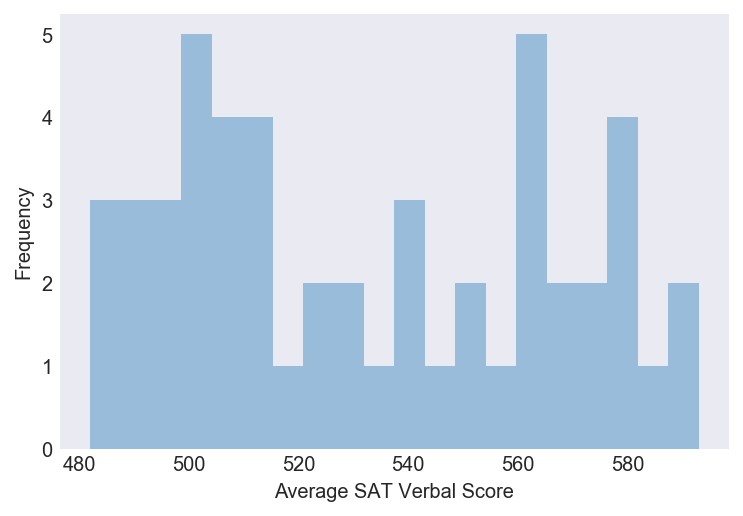

In [42]:
(fig, ax) = plt.subplots()
ax = sns.distplot(df['Verbal'], bins=20, kde=False, ax=ax)
ax.set(xlabel = 'Average SAT Verbal Score', ylabel='Frequency')
None

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [43]:
above_median_states = list(df[df.Verbal > df.Verbal.median()]['State'])
above_median_states

['CO',
 'OH',
 'MT',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

In [44]:
df[df.Verbal > df.Verbal.median()].index.nunique()

24

### Confirm the same 24 states have verbal scores > mean and median SAT verbal score

In [45]:
above_mean_states == above_median_states

True

The same 24 states whose Verbal scores lies above the mean also have their SAT verbal scores above the median verbal score. This suggests there are few outliers in the distribution of our SAT Verbal score dataset.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [46]:
df2 = df.copy()
df2['Verbal-Math'] = df['Verbal'] - df['Math']
df2.head()

State  ParticipationRate  Verbal  Math  Total  TeenBirthRate  Verbal %  \
0    CT                 82     509   510   1019           10.1    63.625   
1    NJ                 81     499   513   1012           12.1    62.375   
2    MA                 79     511   515   1026            9.4    63.875   
3    NY                 77     495   505   1000           14.6    61.875   
4    NH                 72     520   516   1036           10.9    65.000   

   Math %  Total %  Rate %  Verbal-Math  
0  63.750  63.6875      82           -1  
1  64.125  63.2500      81          -14  
2  64.375  64.1250      79           -4  
3  63.125  62.5000      77          -10  
4  64.500  64.7500      72            4

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [47]:
# Dataframe showing the greatest difference between Verbal and Math where Verbal is greater than Math.
satgapdf = df2.copy()
satgapdf.sort_values('Verbal-Math', ascending=False, inplace=True)
satgapdf.head(3)

State  ParticipationRate  Verbal  Math  Total  TeenBirthRate  Verbal %  \
27    OH                 26     534   439    973           23.2    66.750   
50    MS                  4     566   551   1117           34.8    70.750   
29    WV                 18     527   512   1039           31.9    65.875   

    Math %  Total %  Rate %  Verbal-Math  
27  54.875  60.8125      26           95  
50  68.875  69.8125       4           15  
29  64.000  64.9375      18           15

In [48]:
# Dataframe showing the greatest difference between Verbal and Math where Math is greater than Verbal.
satgapdf2 = satgapdf.copy()
satgapdf2.sort_values('Verbal-Math', ascending=True, inplace=True)
satgapdf2.head(3)

State  ParticipationRate  Verbal  Math  Total  TeenBirthRate  Verbal %  \
21    HI                 52     485   515   1000           20.6    60.625   
23    CA                 51     498   517   1015           19.0    62.250   
1     NJ                 81     499   513   1012           12.1    62.375   

    Math %  Total %  Rate %  Verbal-Math  
21  64.375  62.5000      52          -30  
23  64.625  63.4375      51          -19  
1   64.125  63.2500      81          -14

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [49]:
# Start with all variables that are measured in the same scale: scores

In [50]:
vm0 = satgapdf2[['Verbal','Math', 'Total','Verbal-Math']]
vm0.corr('pearson')

Verbal      Math     Total  Verbal-Math
Verbal       1.000000  0.899909  0.972453     0.044527
Math         0.899909  1.000000  0.976768    -0.395574
Total        0.972453  0.976768  1.000000    -0.189566
Verbal-Math  0.044527 -0.395574 -0.189566     1.000000

In [51]:
vm0.corr('kendall')

Verbal      Math     Total  Verbal-Math
Verbal       1.000000  0.801924  0.878764     0.046571
Math         0.801924  1.000000  0.931916    -0.168689
Total        0.878764  0.931916  1.000000    -0.085046
Verbal-Math  0.046571 -0.168689 -0.085046     1.000000

In [52]:
vm0.corr('spearman')

Verbal      Math     Total  Verbal-Math
Verbal       1.000000  0.909413  0.951655     0.042032
Math         0.909413  1.000000  0.983639    -0.248781
Total        0.951655  0.983639  1.000000    -0.142439
Verbal-Math  0.042032 -0.248781 -0.142439     1.000000

#### There is a strong positive correlation between Math and Verbal scores. Looking at the Pearson correlation for example, every additional point of Verbal score adds 0.8999 units to the Math score. This is more pronounced when we rank scores and take the Spearman correlation. The higher a student's verbal ability, the higher their math ability. There is a positive (linear) correlation between verbal score and total scores and a stronger correlation between math and total scores. By definition the difference between Verbal and Math scores is positively correlated with Verbal score and negatively correlated with Math scores. The difference between Verbal and Math scores is also negatively correlated with the Total SAT scores.

In [53]:
# For all variables - we can drop the Rate% column as it is simply the participation rate
satgapdf2.drop('Rate %', axis=1).corr()

ParticipationRate    Verbal      Math     Total  \
ParticipationRate           1.000000 -0.888121 -0.773419 -0.849860   
Verbal                     -0.888121  1.000000  0.899909  0.972453   
Math                       -0.773419  0.899909  1.000000  0.976768   
Total                      -0.849860  0.972453  0.976768  1.000000   
TeenBirthRate              -0.569682  0.255018  0.141551  0.200985   
Verbal %                   -0.888121  1.000000  0.899909  0.972453   
Math %                     -0.773419  0.899909  1.000000  0.976768   
Total %                    -0.849860  0.972453  0.976768  1.000000   
Verbal-Math                -0.098671  0.044527 -0.395574 -0.189566   

                   TeenBirthRate  Verbal %    Math %   Total %  Verbal-Math  
ParticipationRate      -0.569682 -0.888121 -0.773419 -0.849860    -0.098671  
Verbal                  0.255018  1.000000  0.899909  0.972453     0.044527  
Math                    0.141551  0.899909  1.000000  0.976768    -0.395574  
Total                   0.200985  0.972453  0.976768  1.000000    -0.189566  
TeenBirthRate           1.000000  0.255018  0.141551  0.200985     0.212821  
Verbal %                0.255018  1.000000  0.899909  0.972453     0.044527  
Math %                  0.141551  0.899909  1.000000  0.976768    -0.395574  
Total %                 0.200985  0.972453  0.976768  1.000000    -0.189566  
Verbal-Math             0.212821  0.044527 -0.395574 -0.189566     1.000000

#### Across all variables there is a strong negative correlation between SAT participation rate and teen birth rate. There is also a negative relationship between SAT Verbal scores, Math scores and Total scores expressed as a percentage and Participation Rate. There is a weak positive relationship between teen birth rates and verbal, math and total scores expressed as a percentage. There is also a weak positive relationship between teen birth rates and the gap between verbal and math scores.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [54]:
vm0.describe()

Verbal        Math        Total  Verbal-Math
count   51.000000   51.000000    51.000000    51.000000
mean   532.529412  531.843137  1064.372549     0.686275
std     33.360667   36.287393    67.886069    15.839811
min    482.000000  439.000000   956.000000   -30.000000
25%    501.000000  503.000000  1003.000000    -6.000000
50%    527.000000  525.000000  1048.000000     0.000000
75%    562.000000  557.500000  1121.500000     4.500000
max    593.000000  603.000000  1196.000000    95.000000

#### The count row confirms the number of observations in the dataframe. Here there are 51 corresponding to the 51 states and territories for which we have SAT information.
#### The mean is the average verbal math, total score and verbal minus math scores for all 51 states and territories. The average SAT verbal and math scores are 533 and 532 rounded to whole numbers, respectively. The average total score is 1064 while the average difference between verbal and math scores is 0.686
#### The standard deviation represents the distribution of the verbal, math and total scores. The standard deviations are large indicating a wide variation in verbal and math ability across states.
#### The min/max is the minimum/maximum state verbal, math and total scores. the lowest state verbal and math scores were 482 and 439 respectively out of 800. The highest average state verbal and math scores were 593 and 603 respectively out of 800, while the maximum average total score across states is 1196.
#### The 25%-50%-75% represent the the 25th, 50th (median) and 75% percentile rankings of state participation rates, verbal and math scores. Looking at the 75th percentile for example, 75% of all states had a verbal score of 562 or lower, a math score of 557 or lower.

In [55]:
satgapdf2.drop('Rate %', axis=1).describe()

ParticipationRate      Verbal        Math        Total  TeenBirthRate  \
count          51.000000   51.000000   51.000000    51.000000      51.000000   
mean           37.000000  532.529412  531.843137  1064.372549      22.715686   
std            27.550681   33.360667   36.287393    67.886069       7.341645   
min             4.000000  482.000000  439.000000   956.000000       9.400000   
25%             9.000000  501.000000  503.000000  1003.000000      17.600000   
50%            33.000000  527.000000  525.000000  1048.000000      22.200000   
75%            64.000000  562.000000  557.500000  1121.500000      27.000000   
max            82.000000  593.000000  603.000000  1196.000000      38.000000   

        Verbal %     Math %    Total %  Verbal-Math  
count  51.000000  51.000000  51.000000    51.000000  
mean   66.566176  66.480392  66.523284     0.686275  
std     4.170083   4.535924   4.242879    15.839811  
min    60.250000  54.875000  59.750000   -30.000000  
25%    62.625000  62.875000  62.687500    -6.000000  
50%    65.875000  65.625000  65.500000     0.000000  
75%    70.250000  69.687500  70.093750     4.500000  
max    74.125000  75.375000  74.750000    95.000000

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [56]:
vm0.cov()

Verbal         Math        Total  Verbal-Math
Verbal       1112.934118  1089.404706  2202.338824    23.529412
Math         1089.404706  1316.774902  2406.179608  -227.370196
Total        2202.338824  2406.179608  4608.518431  -203.840784
Verbal-Math    23.529412  -227.370196  -203.840784   250.899608

In [57]:
satgapdf2.drop('Rate %', axis=1).cov()

ParticipationRate       Verbal         Math        Total  \
ParticipationRate          759.04000  -816.280000  -773.220000 -1589.500000   
Verbal                    -816.28000  1112.934118  1089.404706  2202.338824   
Math                      -773.22000  1089.404706  1316.774902  2406.179608   
Total                    -1589.50000  2202.338824  2406.179608  4608.518431   
TeenBirthRate             -115.22800    62.459529    37.710510   100.170039   
Verbal %                  -102.03500   139.116765   136.175588   275.292353   
Math %                     -96.65250   136.175588   164.596863   300.772451   
Total %                    -99.34375   137.646176   150.386225   288.032402   
Verbal-Math                -43.06000    23.529412  -227.370196  -203.840784   

                   TeenBirthRate    Verbal %      Math %     Total %  \
ParticipationRate    -115.228000 -102.035000  -96.652500  -99.343750   
Verbal                 62.459529  139.116765  136.175588  137.646176   
Math                   37.710510  136.175588  164.596863  150.386225   
Total                 100.170039  275.292353  300.772451  288.032402   
TeenBirthRate          53.899749    7.807441    4.713814    6.260627   
Verbal %                7.807441   17.389596   17.021949   17.205772   
Math %                  4.713814   17.021949   20.574608   18.798278   
Total %                 6.260627   17.205772   18.798278   18.002025   
Verbal-Math            24.749020    2.941176  -28.421275  -12.740049   

                   Verbal-Math  
ParticipationRate   -43.060000  
Verbal               23.529412  
Math               -227.370196  
Total              -203.840784  
TeenBirthRate        24.749020  
Verbal %              2.941176  
Math %              -28.421275  
Total %             -12.740049  
Verbal-Math         250.899608

#### 1. The covariance matrix provides a sense of whether two variables moves together (positive covariance) or in opposite directions (negative covariance). The correlation matrix by contrast scales the direction of movement between -1 and +1 by dividing the covariance of two variables by the product of their individual standard deviations.

#### 2. Cov(X,Y) = Corr(X,Y).std(X).std(Y)

#### 3. The correlation matrix scales/standardizes the co-relationship between two variables between -1 and +1 allowing us to quantify the strength of the relationship between two variables. Knowing that two variables have a positive correlation of 0.8 means the correlation is twice as strong as two variables with correlation = 0.4. This is slightly more difficult with covariance, an unscaled measure of how two variables move with one another. Two variables have different units and their covariance =  600 we can they move in lock-step more than two variables whose covariance is 300 but we cannot say the strength of the relationship between 'a' and 'b' is twice the strength of the relationship between 'c' and 'd'.

#### 4: Correlation is a unit free measure whereas the units of covariance is the product of the units of two variables. Covariance is also affected by any changes in scale to either of the two variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [58]:
drugs = pd.read_csv('drug-use-by-age.csv')
drugs.head()

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0               -        ...                    0.1                24.5   
1             3.0        ...                    0.1                41.0   
2               -        ...                    0.4                 4.5   
3             9.5        ...                    0.8                 3.0   
4             1.0        ...                    1.1                 4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   
3               2.0                     4.5            1.5   
4               2.4                    11.0            1.8   

  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                 2.0       0.0               -           0.2   
1                 4.0       0.1             5.0           0.1   
2                12.0       0.1            24.0           0.2   
3                 6.0       0.3            10.5           0.4   
4                 9.5       0.3            36.0           0.2   

  sedative-frequency  
0               13.0  
1               19.0  
2               16.5  
3               30.0  
4                3.0  

[5 rows x 28 columns]

In [59]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

#### There are no missing observations but several drug-use and drug-frequency variables have '-' in them to represent NaN values which prevent them from being type 'float'. Without this cleaning, it would not be possible to visualize or run aggregation functions such as 'mean' on variables such as 'crack-frequency'. Age is of type 'object' because from row 11 onwards, ages are clumped together. 'Age' may be better suited to being a 'category' type. 

In [60]:
drugs2 = pd.read_csv('drug-use-by-age.csv', na_values='-')
drugs2

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                3.0            1.1   
1      13  2757          8.5                6.0            3.4   
2      14  2792         18.1                5.0            8.7   
3      15  2956         29.2                6.0           14.5   
4      16  3058         40.1               10.0           22.5   
5      17  3038         49.3               13.0           28.0   
6      18  2469         58.7               24.0           33.7   
7      19  2223         64.6               36.0           33.4   
8      20  2271         69.7               48.0           34.0   
9      21  2354         83.2               52.0           33.0   
10  22-23  4707         84.2               52.0           28.4   
11  24-25  4591         83.1               52.0           24.9   
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5               52.0           16.4   
14  35-49  7391         75.0               52.0           10.4   
15  50-64  3923         67.2               52.0            7.3   
16    65+  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
0                   4.0          0.1                5.0        0.0   
1                  15.0          0.1                1.0        0.0   
2                  24.0          0.1                5.5        0.0   
3                  25.0          0.5                4.0        0.1   
4                  30.0          1.0                7.0        0.0   
5                  36.0          2.0                5.0        0.1   
6                  52.0          3.2                5.0        0.4   
7                  60.0          4.1                5.5        0.5   
8                  60.0          4.9                8.0        0.6   
9                  52.0          4.8                5.0        0.5   
10                 52.0          4.5                5.0        0.5   
11                 60.0          4.0                6.0        0.5   
12                 52.0          3.2                5.0        0.4   
13                 72.0          2.1                8.0        0.5   
14                 48.0          1.5               15.0        0.5   
15                 52.0          0.9               36.0        0.4   
16                 36.0          0.0                NaN        0.0   

    crack-frequency         ...          oxycontin-use  oxycontin-frequency  \
0               NaN         ...                    0.1                 24.5   
1               3.0         ...                    0.1                 41.0   
2               NaN         ...                    0.4                  4.5   
3               9.5         ...                    0.8                  3.0   
4               1.0         ...                    1.1                  4.0   
5              21.0         ...                    1.4                  6.0   
6              10.0         ...                    1.7                  7.0   
7               2.0         ...                    1.5                  7.5   
8               5.0         ...                    1.7                 12.0   
9              17.0         ...                    1.3                 13.5   
10              5.0         ...                    1.7                 17.5   
11              6.0         ...                    1.3                 20.0   
12              6.0         ...                    1.2                 13.5   
13             15.0         ...                    0.9                 46.0   
14             48.0         ...                    0.3                 12.0   
15             62.0         ...                    0.4                  5.0   
16              NaN         ...                    0.0                  NaN   

    tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0                0.2                    52.0            0.2   
1      

In [61]:
drugs2.age = drugs2.age.astype('category')
drugs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null category
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxyco

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [62]:
drugs2.describe()

n  alcohol-use  alcohol-frequency  marijuana-use  \
count    17.000000    17.000000          17.000000      17.000000   
mean   3251.058824    55.429412          33.352941      18.923529   
std    1297.890426    26.878866          21.318833      11.959752   
min    2223.000000     3.900000           3.000000       1.100000   
25%    2469.000000    40.100000          10.000000       8.700000   
50%    2798.000000    64.600000          48.000000      20.800000   
75%    3058.000000    77.500000          52.000000      28.400000   
max    7391.000000    84.200000          52.000000      34.000000   

       marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
count            17.000000    17.000000          16.000000  17.000000   
mean             42.941176     2.176471           7.875000   0.294118   
std              18.362566     1.816772           8.038449   0.235772   
min               4.000000     0.000000           1.000000   0.000000   
25%              30.000000     0.500000           5.000000   0.000000   
50%              52.000000     2.000000           5.250000   0.400000   
75%              52.000000     4.000000           7.250000   0.500000   
max              72.000000     4.900000          36.000000   0.600000   

       crack-frequency  heroin-use         ...          oxycontin-use  \
count        14.000000   17.000000         ...              17.000000   
mean         15.035714    0.352941         ...               0.935294   
std          18.111263    0.333762         ...               0.608216   
min           1.000000    0.000000         ...               0.000000   
25%           5.000000    0.100000         ...               0.400000   
50%           7.750000    0.200000         ...               1.100000   
75%          16.500000    0.600000         ...               1.400000   
max          62.000000    1.100000         ...               1.700000   

       oxycontin-frequency  tranquilizer-use  tranquilizer-frequency  \
count            16.000000         17.000000               17.000000   
mean             14.812500          2.805882               11.735294   
std              12.798275          1.753379               11.485205   
min               3.000000          0.200000                4.500000   
25%               5.750000          1.400000                6.000000   
50%              12.000000          3.500000               10.000000   
75%              18.125000          4.200000               11.000000   
max              46.000000          5.400000               52.000000   

       stimulant-use  stimulant-frequency   meth-use  meth-frequency  \
count      17.000000            17.000000  17.000000       15.000000   
mean        1.917647            31.147059   0.382353       35.966667   
std         1.407673            85.973790   0.262762       31.974581   
min         0.000000             2.000000   0.000000        2.000000   
25%         0.600000             7.000000   0.200000       12.000000   
50%         1.800000            10.000000   0.400000       30.000000   
75%         3.000000            12.000000   0.600000       47.000000   
max         4.100000           364.000000   0.900000      105.000000   

       sedative-use  sedative-frequency  
count     17.000000           17.000000  
mean       0.282353           19.382353  
std        0.138000           24.833527  
min        0.000000            3.000000  
25%        0.200000            6.500000  
50%        0.300000           10.000000  
75%        0.400000           17.500000  
max        0.500000          104.000000  

[8 rows x 27 columns]

In [63]:
# Correlation Matrix of Drug Use
drugs2.corr('pearson')

n  alcohol-use  alcohol-frequency  \
n                        1.000000     0.310512           0.313431   
alcohol-use              0.310512     1.000000           0.897889   
alcohol-frequency        0.313431     0.897889           1.000000   
marijuana-use           -0.169007     0.594165           0.260219   
marijuana-frequency      0.135597     0.920425           0.818769   
cocaine-use             -0.021565     0.773458           0.577601   
cocaine-frequency        0.365386     0.254042           0.391981   
crack-use                0.281797     0.877378           0.785050   
crack-frequency          0.548114     0.202732           0.333935   
heroin-use               0.007798     0.677614           0.546194   
heroin-frequency         0.615534     0.327330           0.381874   
hallucinogen-use        -0.295302     0.463702           0.182184   
hallucinogen-frequency   0.008743    -0.346643          -0.174622   
inhalant-use            -0.368395    -0.648248          -0.864153   
inhalant-frequency       0.190410    -0.556707          -0.305296   
pain-releiver-use       -0.083587     0.617523           0.280704   
pain-releiver-frequency -0.112076    -0.263721           0.007087   
oxycontin-use           -0.166039     0.589219           0.251554   
oxycontin-frequency     -0.024438    -0.052126           0.119852   
tranquilizer-use        -0.071086     0.735785           0.448543   
tranquilizer-frequency  -0.102301    -0.550501          -0.415026   
stimulant-use           -0.201621     0.582241           0.291766   
stimulant-frequency     -0.114792    -0.028115           0.260304   
meth-use                -0.063571     0.682531           0.425153   
meth-frequency           0.485909     0.282820           0.253725   
sedative-use            -0.119997     0.318268           0.029867   
sedative-frequency       0.256701     0.091251           0.201423   

                         marijuana-use  marijuana-frequency  cocaine-use  \
n                            -0.169007             0.135597    -0.021565   
alcohol-use                   0.594165             0.920425     0.773458   
alcohol-frequency             0.260219             0.818769     0.577601   
marijuana-use                 1.000000             0.615610     0.883789   
marijuana-frequency           0.615610             1.000000     0.742598   
cocaine-use                   0.883789             0.742598     1.000000   
cocaine-frequency            -0.273950             0.250348    -0.163922   
crack-use                     0.620670             0.892077     0.835727   
crack-frequency              -0.476095             0.113860    -0.339153   
heroin-use                    0.711613             0.631789     0.899944   
heroin-frequency             -0.047566             0.277175     0.058679   
hallucinogen-use              0.959353             0.528733     0.855668   
hallucinogen-frequency       -0.478286            -0.380430    -0.368402   
inhalant-use                  0.127336            -0.577792    -0.214609   
inhalant-frequency           -0.799094            -0.598028    -0.636591   
pain-releiver-use             0.966226             0.612254     0.906638   
pain-releiver-frequency      -0.506892            -0.285292    -0.273908   
oxycontin-use                 0.971733             0.609618     0.865626   
oxycontin-frequency          -0.323519             0.040880    -0.075193   
tranquilizer-use              0.935199             0.768339     0.920430   
tranquilizer-frequency       -0.401769            -0.591449    -0.294905   
stimulant-use                 0.968096             0.561246     0.923954   
stimulant-frequency          -0.389145            -0.069454    -0.309286   
meth-use                      0.870446             0.664280     0.889353   
meth-frequency                0.014585             0.317099     0.043154   
sedative-use                  0.616766             0.399124     0.461914   
sedative-frequency           -0.277144         

### Heatmap of Drug Dataset Correlations

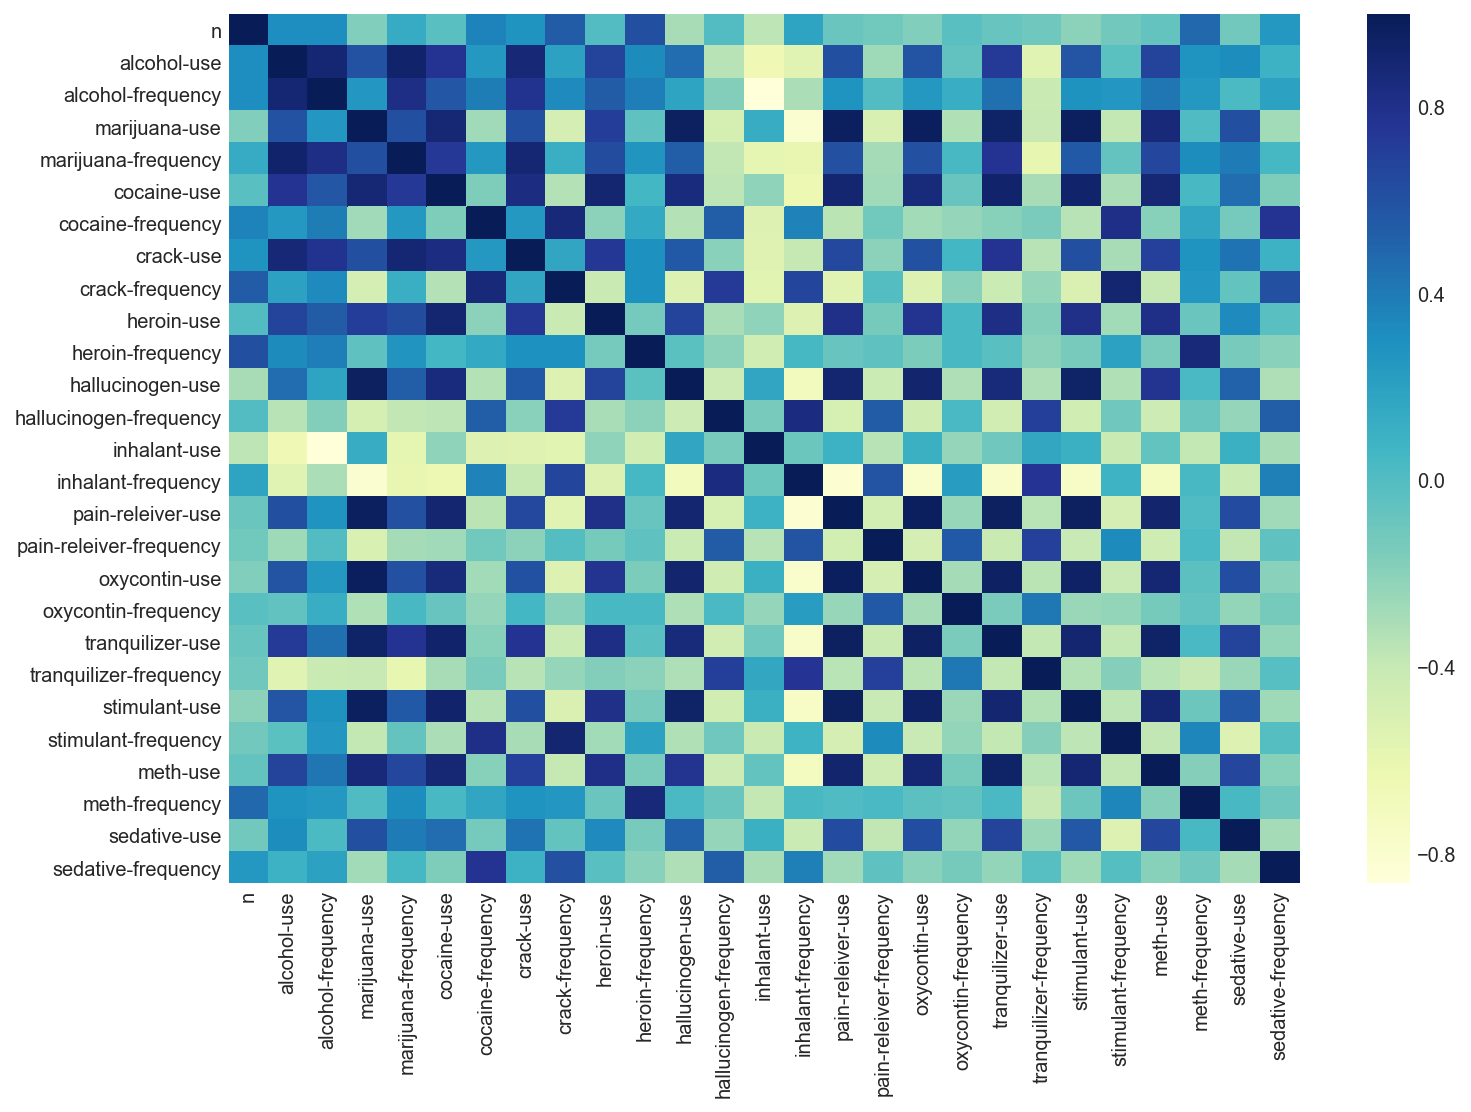

In [64]:
corrmat = drugs2.corr('pearson')
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(corrmat, cmap = 'YlGnBu')
ax.set(xticklabels=corrmat.columns.values, yticklabels=corrmat.columns.values)
None

#### Interestingly, there appears to be large correlations between alcohol and marijuana use and frequency and cocaine use as represented by the deep blue box at the top left of the heatmap.

In [65]:
sns.pairplot(drugs2.dropna())
None

## Plotting Drug Use

In [66]:
drugcols = list(drugs.columns)
use = [s for s in drugcols if "-use" in s]
freq = [s for s in drugcols if "-frequency" in s]
drugs_all = drugs2.copy()

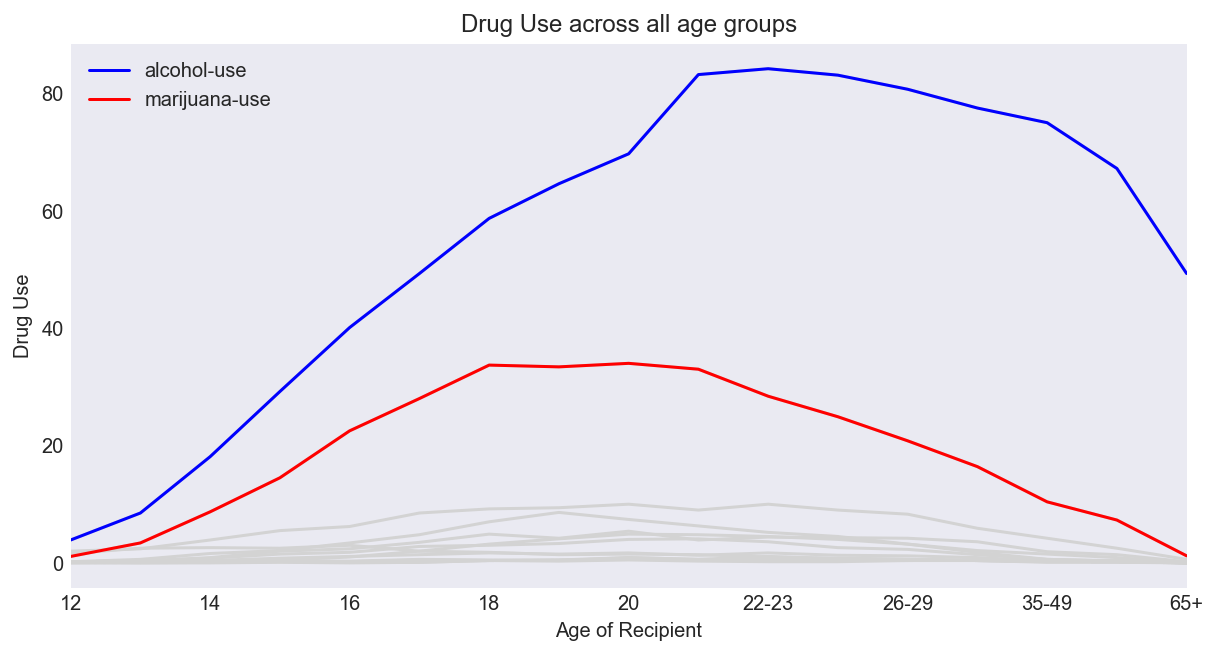

In [67]:
(fig, ax) = plt.subplots(figsize=(10,5))
sns.set_style("white")
ax = drugs_all.plot(ax=ax, x='age', y=use, legend=False, style='lightgrey')
ax = drugs_all['alcohol-use'].plot(style = 'blue', legend = True, ax=ax)
ax = drugs_all['marijuana-use'].plot(style = 'red', legend = True, ax=ax)
ax.set(xlabel='Age of Recipient', ylabel='Drug Use', title='Drug Use across all age groups')
None

#### Note the use of all other narcotices pales when compared against alcohol and marijuana use. Unlike other drugs, the rate of alcohol consumption continues to rise until 23 after which it tapers off. Marijuana use similary increases until age 18 and begins to decline after 21.

## Plotting Drug Use excluding Alcohol and Marijuana

In [68]:
drugs3 = drugs_all.copy()
drugs3 = drugs3.drop(['alcohol-use', 'marijuana-use'], axis=1)
drugcols2 = list(drugs3.columns)
use2 = [s for s in drugcols2 if "-use" in s]

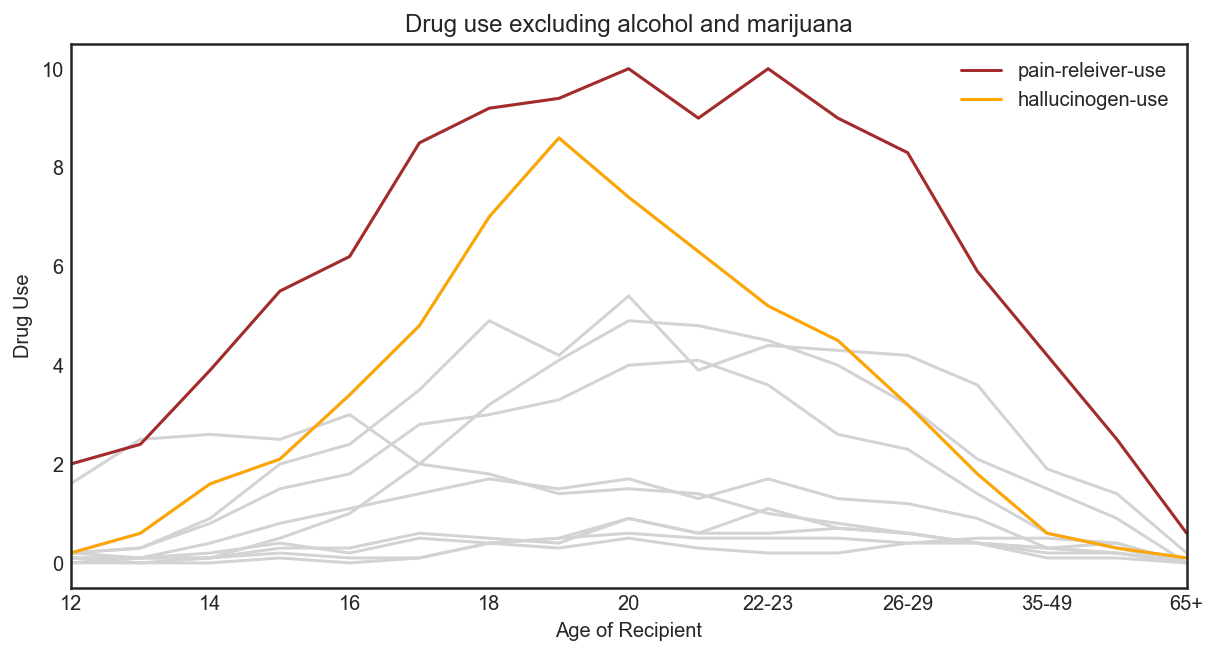

In [69]:
(fig, ax) = plt.subplots(figsize=(10,5))
sns.set_style("white")
ax = drugs3.plot(ax=ax, x='age', y=use2, legend=False, style='lightgrey')
ax = drugs_all['pain-releiver-use'].plot(style = 'brown', legend = True, ax=ax)
ax = drugs_all['hallucinogen-use'].plot(style = 'orange', legend = True, ax=ax)
ax.set(xlabel='Age of Recipient', ylabel='Drug Use', title='Drug use excluding alcohol and marijuana')
None

#### Excluding alcohol and marijuana use, we see that among the remaining narcotics, pain-releivers and hallucinogens are the most widely used, both of which peak use in people's early twenties.

## Plotting Drug Frequency

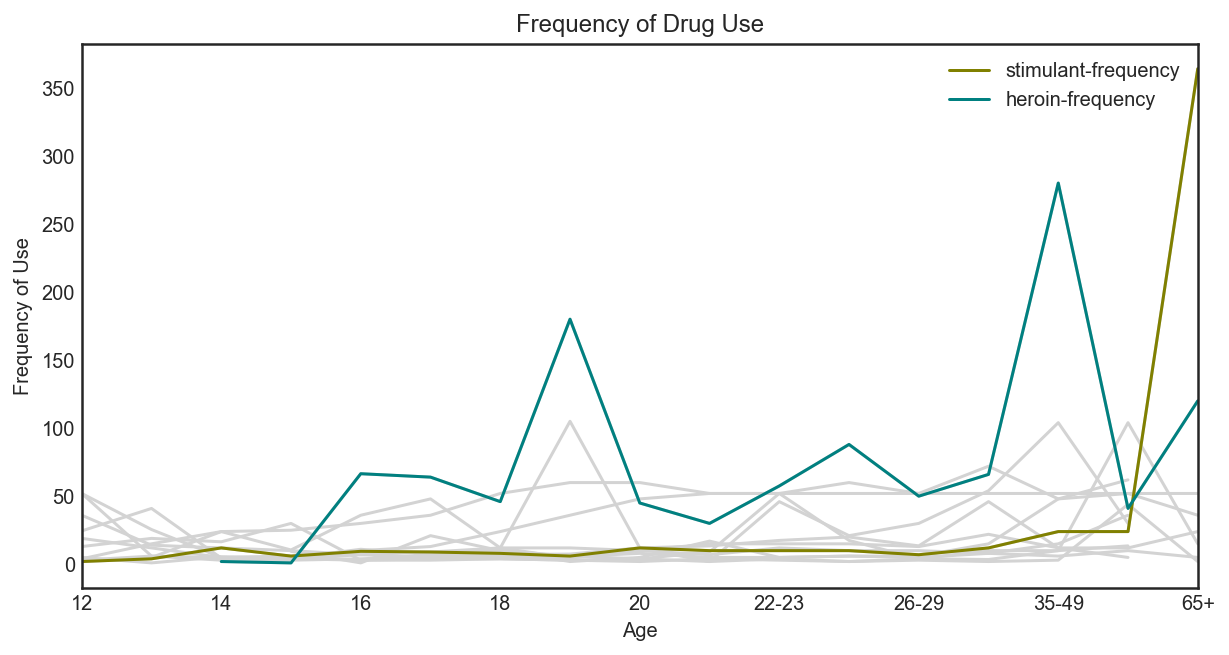

In [70]:
(fig, ax) = plt.subplots(figsize=(10,5))
sns.set_style('white')
ax = drugs_all.plot(ax=ax, x='age', y=freq, legend=False, style='lightgrey')
ax = drugs_all['stimulant-frequency'].plot(style = 'olive', legend = True, ax=ax)
ax = drugs_all['heroin-frequency'].plot(style = 'teal', legend = True, ax=ax)
ax.set(xlabel='Age', ylabel='Frequency of Use', title='Frequency of Drug Use')
None

#### When charting the frequency of drug use we note that stimulant frequency shoots up for people in the 50s while the frequency of heroin and meth use spikes up at age 19 and ages 35-49. Note in the figure below the frequency of alcohol and marijuana consumption by contrast is pretty stable.

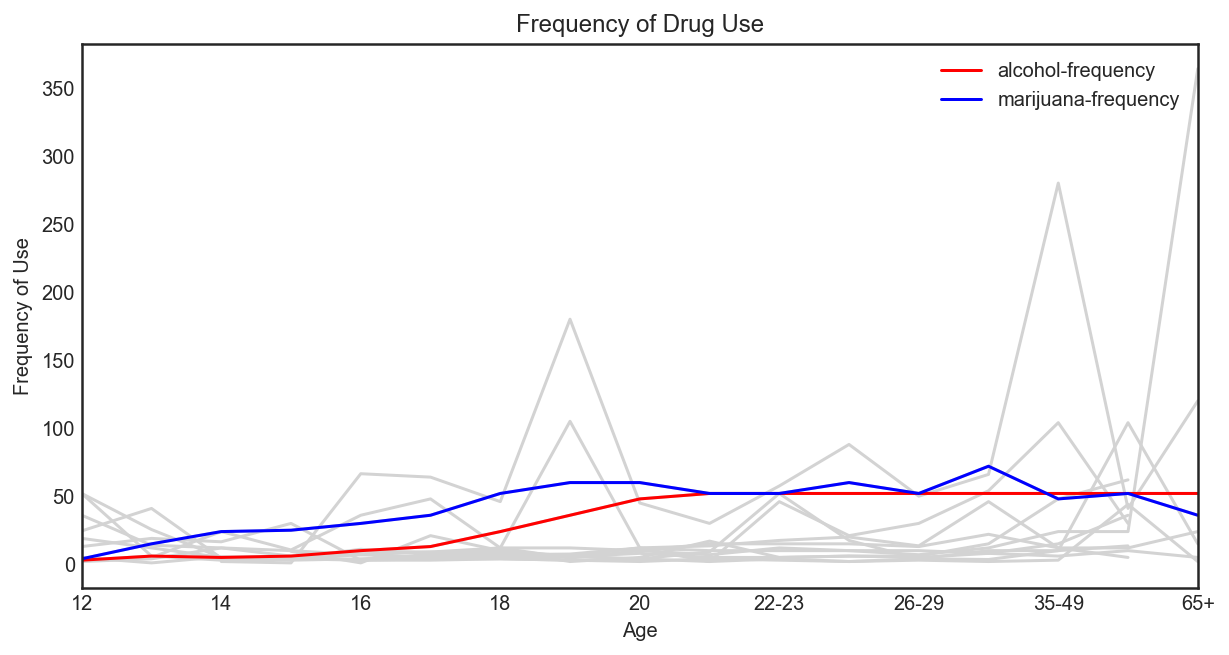

In [71]:
(fig, ax) = plt.subplots(figsize=(10,5))
sns.set_style('white')
ax = drugs_all.plot(ax=ax, x='age', y=freq, legend=False, style='lightgrey')
ax = drugs_all['alcohol-frequency'].plot(style = 'red', legend = True, ax=ax)
ax = drugs_all['marijuana-frequency'].plot(style = 'blue', legend = True, ax=ax)
ax.set(xlabel='Age', ylabel='Frequency of Use', title='Frequency of Drug Use')
None

## Juvenile drug statistics

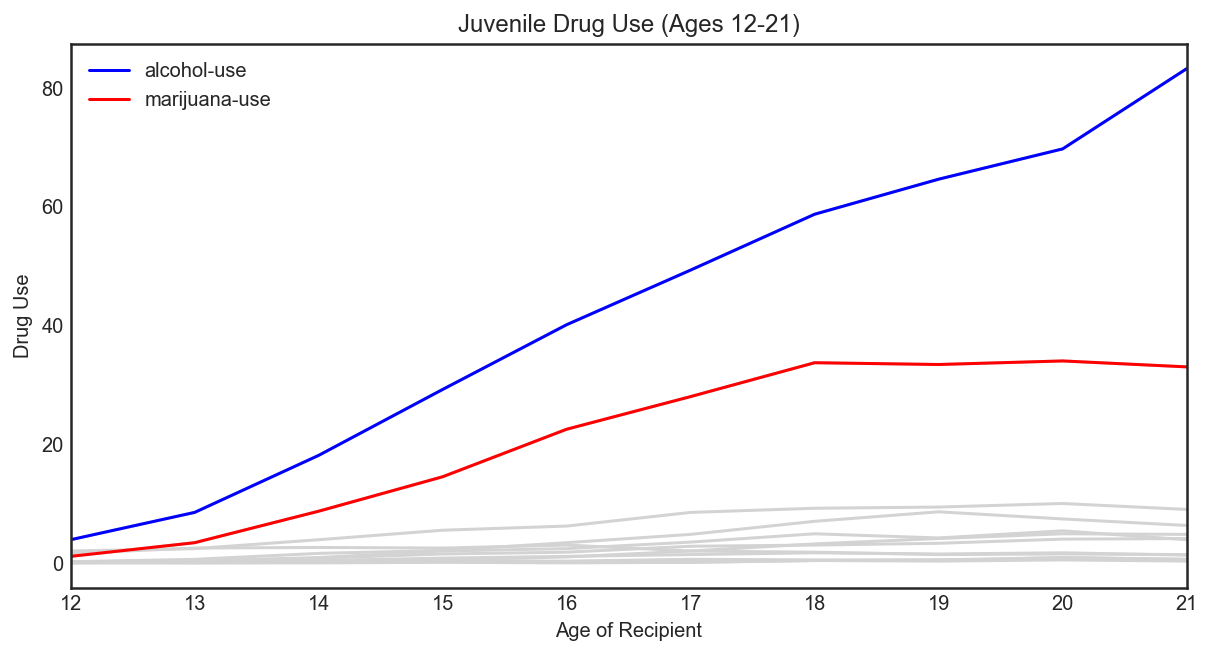

In [72]:
juvenile = drugs.loc[:9]
sns.set_style('white')
(fig, ax) = plt.subplots(figsize=(10,5))
ax = juvenile.plot(ax=ax, x='age', y=use, legend=False, style='lightgrey')
ax = juvenile['alcohol-use'].plot(style = 'blue', legend = True, ax=ax)
ax = juvenile['marijuana-use'].plot(style = 'red', legend = True, ax=ax)
ax.set(xlabel='Age of Recipient', ylabel='Drug Use', title='Juvenile Drug Use (Ages 12-21)')
None

### We note the worrying trends in the growth of alcohol and marijuana use among juveniles in the US. Marijuana use appears to taper off after 18 whereas underage drinking continues to rise until the legal age of 21.

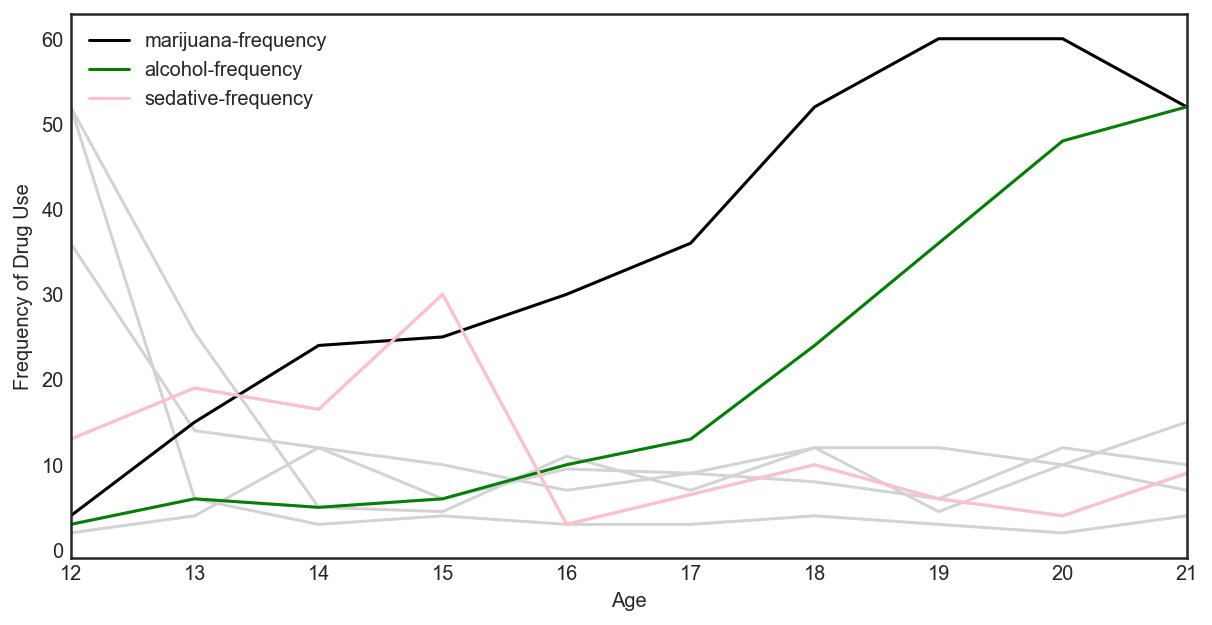

In [73]:
(fig, ax) = plt.subplots(figsize=(10,5))
ax = juvenile.plot(ax=ax, x='age', y=freq, legend=False, style='lightgrey')
ax = juvenile['marijuana-frequency'].plot(style = 'black', legend = True, ax=ax)
ax = juvenile['alcohol-frequency'].plot(style = 'green', legend = True, ax=ax)
ax = juvenile['sedative-frequency'].plot(style = 'pink', legend = True, ax=ax)
ax.set(xlabel='Age', ylabel='Frequency of Drug Use')
None

#### Juveniles use marijuana more frequently than alcohol although the frequency of use becomes equal by age 21. There is a spike in the frequency of sedative use.

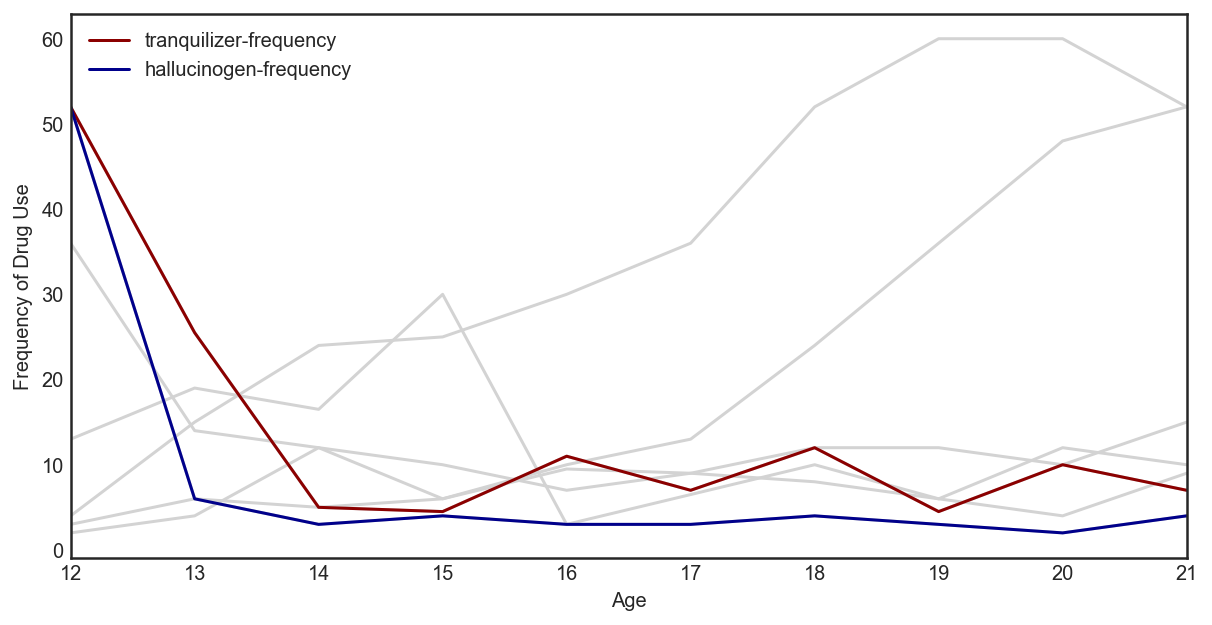

In [74]:
(fig, ax) = plt.subplots(figsize=(10,5))
ax = juvenile.plot(ax=ax, x='age', y=freq, legend=False, style='lightgrey')
ax = juvenile['tranquilizer-frequency'].plot(style = 'darkred', legend = True, ax=ax)
ax = juvenile['hallucinogen-frequency'].plot(style = 'darkblue', legend = True, ax=ax)
ax.set(xlabel='Age', ylabel='Frequency of Drug Use')
None

#### Surprisingly there are a lot of 12 year olds frequently using tranquilizers and hallucinogens, although this behavior is curbed within a year or two.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

Hypothesis 1: There is a direct correltion between marijuana and cocaine use

Hypothesis 2: The distribution of average Marijuana usage by age group follows a normal distribution

Hypothesis 3: Average Marijuana use declines after 21. The null hypothesis is that average drug use for under 21s is the same as that for over 21s.

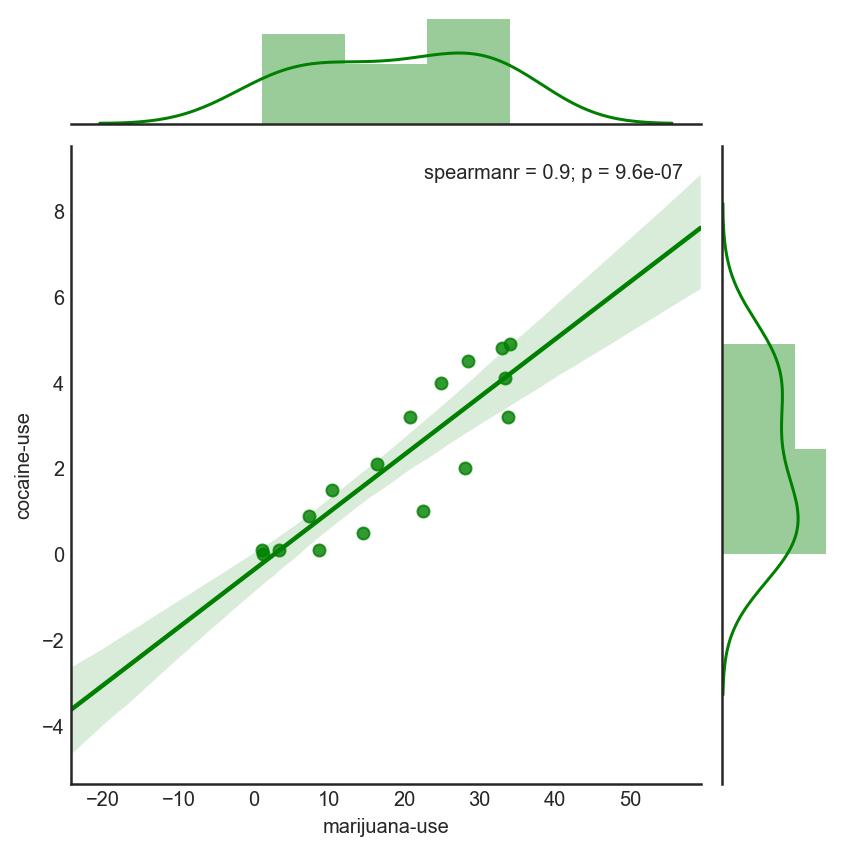

In [75]:
# Examine the jointplot between Cocaine and Marijuana use
from scipy.stats import spearmanr
sns.jointplot(x=drugs_all['marijuana-use'], y=drugs_all['cocaine-use'], kind='reg', stat_func=spearmanr, color='g')
None

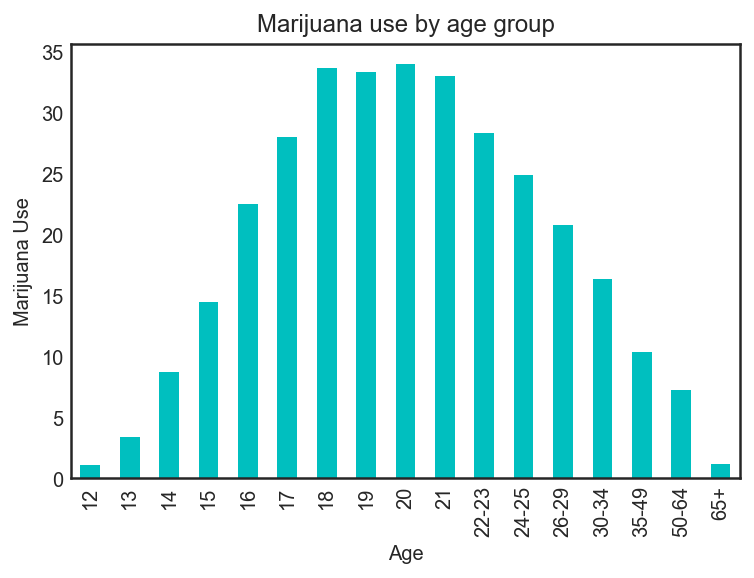

In [76]:
# Code: Visual inspection reveals Marijuana usage is highest for juveniles, before tapering off around the age of 18
# and falling once a person enters their early twenties. The distribution appears normal.
mj_use = drugs_all[['age','marijuana-use']]
(fig, ax) =plt.subplots()
ax = mj_use.plot(kind='bar', x='age', legend=False, color='c',ax=ax)
ax.set(xlabel='Age', ylabel='Marijuana Use', title='Marijuana use by age group')
None

In [77]:
from scipy.stats import normaltest, shapiro
print normaltest(mj_use['marijuana-use'])
print shapiro(mj_use['marijuana-use'])

NormaltestResult(statistic=4.6688526918246955, pvalue=0.096866034187684483)
(0.9099645614624023, 0.09990019351243973)


/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [78]:
under21mjuse = drugs_all[['marijuana-use']].loc[:8]
over21mjuse = drugs_all[['marijuana-use']].loc[9:]
print "Under 21 average drug use is", under21mjuse['marijuana-use'].mean()
print "Over 21 average drug use is", over21mjuse['marijuana-use'].mean()

Under 21 average drug use is 19.9222222222
Over 21 average drug use is 17.8


In [79]:
import scipy.stats as stats
stats.mannwhitneyu(under21mjuse, over21mjuse)

MannwhitneyuResult(statistic=31.0, pvalue=0.33250277105101456)

**Report**

We note the positive correlation between cocaine use and marijuana use when using the spearman correlation coefficient, suggesting a positive relationship between the pair.

The normal test returns a Chi-square statistic and the associated p-value. The function tests the null hypothesis that
the sample is Normally distributed. The p-value is the probability that a value that large would be seen. Here the p-value of 9.6% indicating that it is likely that marijuana usage is normally distributed. However we should be wary about making conculsions based on < 50 observations, hence we invoke the Shapiro test of normality.

Given the results of the Mann-Whitney U test, it is not unlikely that the average drug use for Under 21s is different from the average drug use of over 21s.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

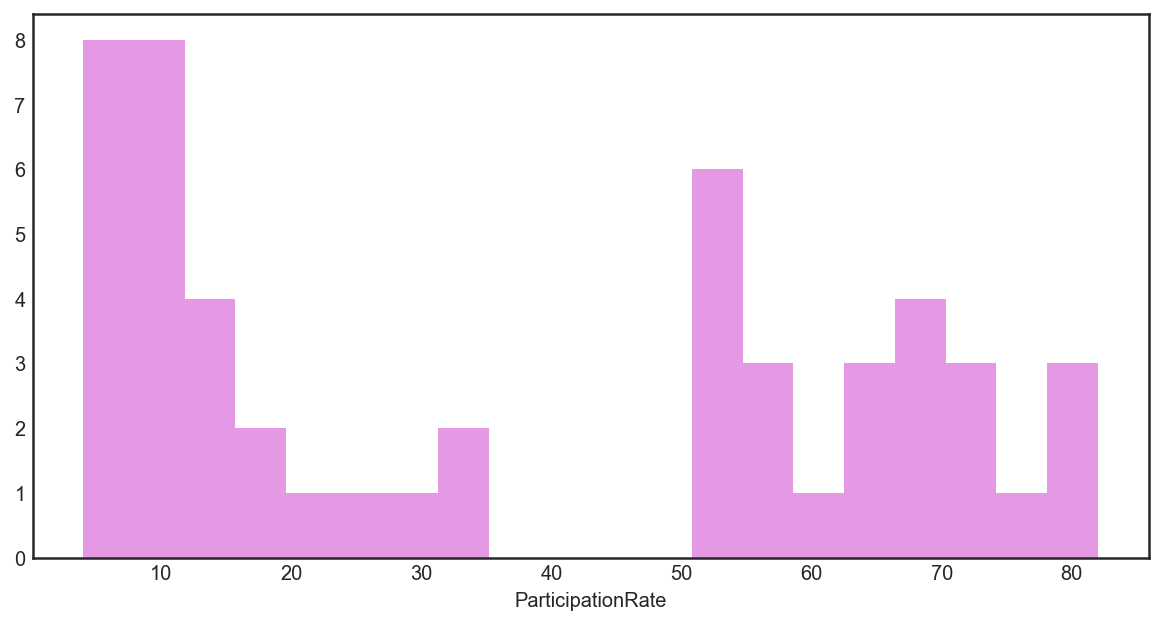

In [80]:
sat_rate = sat_teen_pregnancy['ParticipationRate']
(fig, ax) = plt.subplots(figsize=(10, 5))
ax = sns.distplot(sat_rate, bins=20, ax=ax, kde=False, color='m')
None

#### Given the distribution of the SAT participation rate dataset there are actually two groups of data, making the notion of outliers difficult to spot. We can confirm this using a box plot and by checking whether there are any datapoints that are +/- 3 standard deviations from the mean.

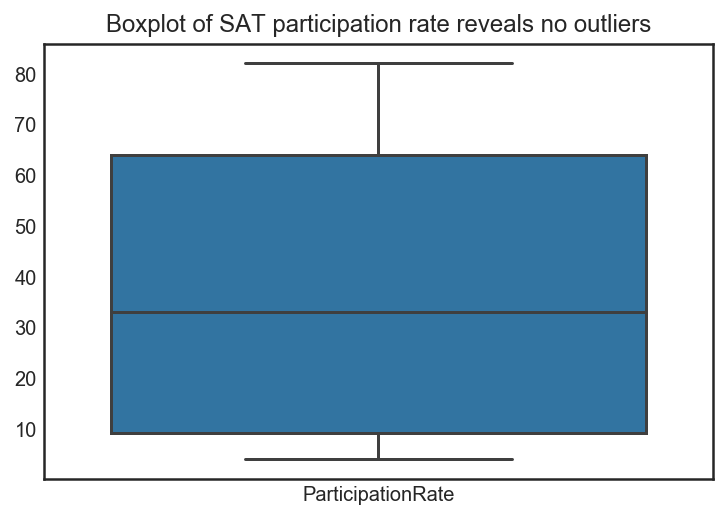

In [81]:
(fig, ax) = plt.subplots()
ax = sns.boxplot(data=sat_teen_pregnancy[['ParticipationRate']], ax=ax)
ax.set(title='Boxplot of SAT participation rate reveals no outliers')
None

In [82]:
# Define an outlier as anything greater than +/- 3 s.d. from the mean
part_rate = sat_teen_pregnancy[['State','ParticipationRate']]
part_rate_outliers = part_rate.copy()
part_rate_outliers = part_rate[((part_rate['ParticipationRate'] - part_rate['ParticipationRate'].mean())
                                /part_rate_outliers['ParticipationRate'].std()).abs() > 3]
part_rate_outliers
# There are no outliers present

Empty DataFrame
Columns: [State, ParticipationRate]
Index: []

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [83]:
satdf[['Verbal', 'Math']].corr('pearson')

Verbal      Math
Verbal  1.000000  0.899909
Math    0.899909  1.000000

In [84]:
satdf[['Verbal', 'Math']].corr('spearman')

Verbal      Math
Verbal  1.000000  0.909413
Math    0.909413  1.000000

#### The Spearman correlation coefficient between SAT verbal and math scores is higher than the Pearson correlations coefficient. The Spearman measure works by first ranking each state by verbal and math scores and taking the sum of the squared difference of the ranks. Where two ranks are tied, mean ranks are assigned. This value is multiplied by 6 and divided by n(n^2-1) and then subtracted from 1.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [85]:
satdfpct = satdf.copy()
satdfpct['Pct_Rank'] = [stats.percentileofscore(satdfpct['Rate'].values, i) for i in satdfpct['Rate'].values]
satdfpct

State  Rate  Verbal  Math    Pct_Rank
0     CT    82     509   510  100.000000
1     NJ    81     499   513   98.039216
2     MA    79     511   515   96.078431
3     NY    77     495   505   94.117647
4     NH    72     520   516   92.156863
5     RI    71     501   499   89.215686
6     PA    71     500   499   89.215686
7     VT    69     511   506   85.294118
8     ME    69     506   500   85.294118
9     VA    68     510   501   82.352941
10    DE    67     501   499   80.392157
11    MD    65     508   510   77.450980
12    NC    65     493   499   77.450980
13    GA    63     491   489   74.509804
14    IN    60     499   501   72.549020
15    SC    57     486   488   70.588235
16    DC    56     482   474   68.627451
17    OR    55     526   526   66.666667
18    FL    54     498   499   64.705882
19    WA    53     527   527   61.764706
20    TX    53     493   499   61.764706
21    HI    52     485   515   58.823529
22    AK    51     514   510   55.882353
23    CA    51     498   517   55.882353
24    AZ    34     523   525   52.941176
25    NV    33     509   515   50.980392
26    CO    31     539   542   49.019608
27    OH    26     534   439   47.058824
28    MT    23     539   539   45.098039
29    WV    18     527   512   43.137255
30    ID    17     543   542   41.176471
31    TN    13     562   553   38.235294
32    NM    13     551   542   38.235294
33    IL    12     576   589   34.313725
34    KY    12     550   550   34.313725
35    WY    11     547   545   30.392157
36    MI    11     561   572   30.392157
37    MN     9     580   589   25.490196
38    KS     9     577   580   25.490196
39    AL     9     559   554   25.490196
40    NE     8     562   568   19.607843
41    OK     8     567   561   19.607843
42    MO     8     577   577   19.607843
43    LA     7     564   562   15.686275
44    WI     6     584   596   12.745098
45    AR     6     562   550   12.745098
46    UT     5     575   570    8.823529
47    IA     5     593   603    8.823529
48    SD     4     577   582    3.921569
49    ND     4     592   599    3.921569
50    MS     4     566   551    3.921569

In [86]:
satdfpct[satdfpct.State=='CA']['Pct_Rank']

23    55.882353
Name: Pct_Rank, dtype: float64

#### California's SAT participation rate lands it in the 56th percentile meaning that 44% of all states have a higher participation rate than California. When two variables are not measured in the same unit, we can rank them using a percentile rank and then calculate their correlations, leading to the Spearman rank coefficient.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

#### 1. At a glance percentile ranking a variable allows us to determine outliers. These observations will appear far spaced out from the distribution of other observations. In the rank variable for example, at a glance we can observe the drop in percentile ranking for all states below Alabama and then a further drop in percentile ranking from Arkansas to Utah.

In [87]:
satdfpct.tail(12)

State  Rate  Verbal  Math   Pct_Rank
39    AL     9     559   554  25.490196
40    NE     8     562   568  19.607843
41    OK     8     567   561  19.607843
42    MO     8     577   577  19.607843
43    LA     7     564   562  15.686275
44    WI     6     584   596  12.745098
45    AR     6     562   550  12.745098
46    UT     5     575   570   8.823529
47    IA     5     593   603   8.823529
48    SD     4     577   582   3.921569
49    ND     4     592   599   3.921569
50    MS     4     566   551   3.921569

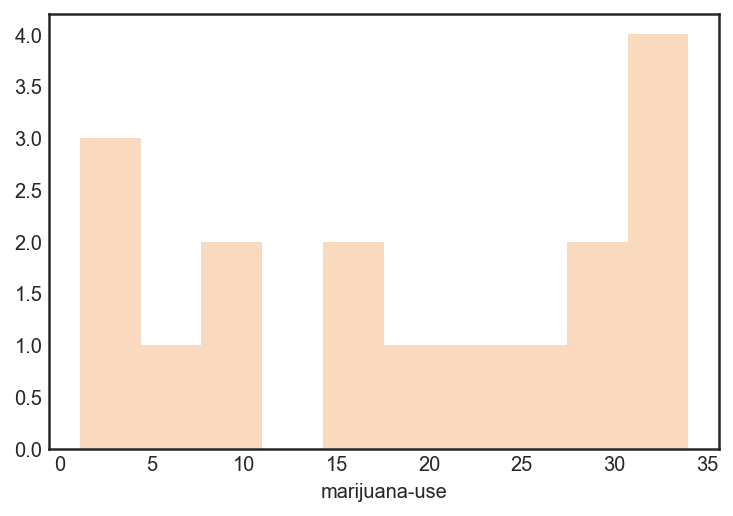

In [88]:
(fig, ax) = plt.subplots()
ax = sns.distplot(drugs_all['marijuana-use'], kde=False, bins=10, ax=ax, color='sandybrown')
None

In [89]:
# Note we have 17 unique observations here.
print len(set(drugs_all['marijuana-use']))
print list(drugs_all['marijuana-use'])

17
[1.1000000000000001, 3.3999999999999999, 8.6999999999999993, 14.5, 22.5, 28.0, 33.700000000000003, 33.399999999999999, 34.0, 33.0, 28.399999999999999, 24.899999999999999, 20.800000000000001, 16.399999999999999, 10.4, 7.2999999999999998, 1.2]


In [90]:
# pandas rank function allows us to rank the individual observations
drugs_all['marijuana-use'].rank()

0      1.0
1      3.0
2      5.0
3      7.0
4     10.0
5     12.0
6     16.0
7     15.0
8     17.0
9     14.0
10    13.0
11    11.0
12     9.0
13     8.0
14     6.0
15     4.0
16     2.0
Name: marijuana-use, dtype: float64

In [91]:
# We are also able to percentile rank individual observations - observing 17 individual ranks
drugs_all['marijuana-use'].rank(pct=True)

0     0.058824
1     0.176471
2     0.294118
3     0.411765
4     0.588235
5     0.705882
6     0.941176
7     0.882353
8     1.000000
9     0.823529
10    0.764706
11    0.647059
12    0.529412
13    0.470588
14    0.352941
15    0.235294
16    0.117647
Name: marijuana-use, dtype: float64

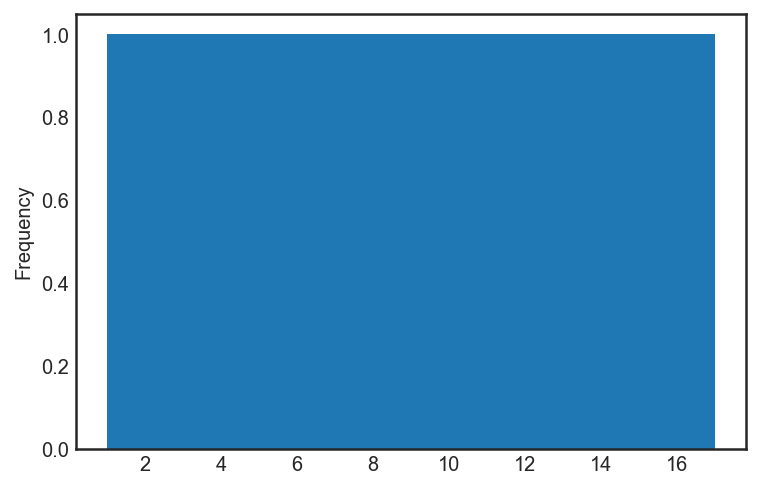

In [92]:
# Taking 17 bins here we see that each value is represented once
drugs_all['marijuana-use'].rank().plot.hist(bins=17)
None

### Percentile Ranking

In [93]:
mj_use_pct = [stats.percentileofscore(drugs_all['marijuana-use'].values, i) 
                   for i in drugs_all['marijuana-use'].values]
print len(mj_use_pct)
print mj_use_pct

17
[5.8823529411764701, 17.647058823529413, 29.411764705882355, 41.17647058823529, 58.82352941176471, 70.588235294117652, 94.117647058823522, 88.235294117647058, 100.0, 82.35294117647058, 76.470588235294116, 64.705882352941174, 52.941176470588239, 47.058823529411761, 35.294117647058826, 23.52941176470588, 11.76470588235294]


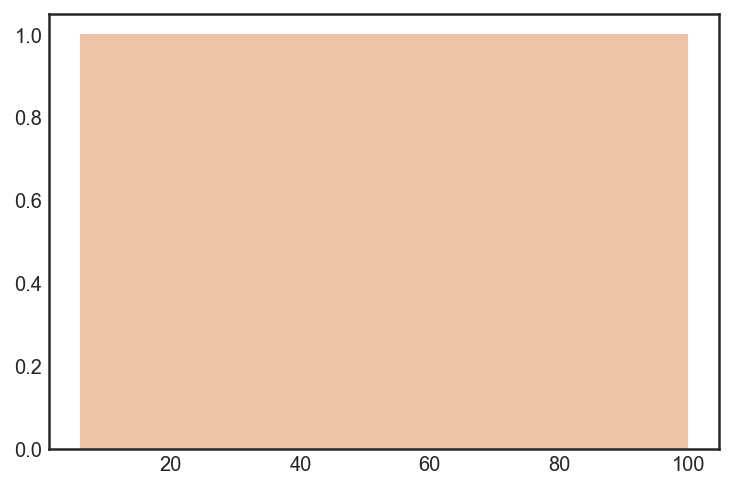

In [94]:
sns.distplot(mj_use_pct, kde=False, bins=17, color='chocolate')
None

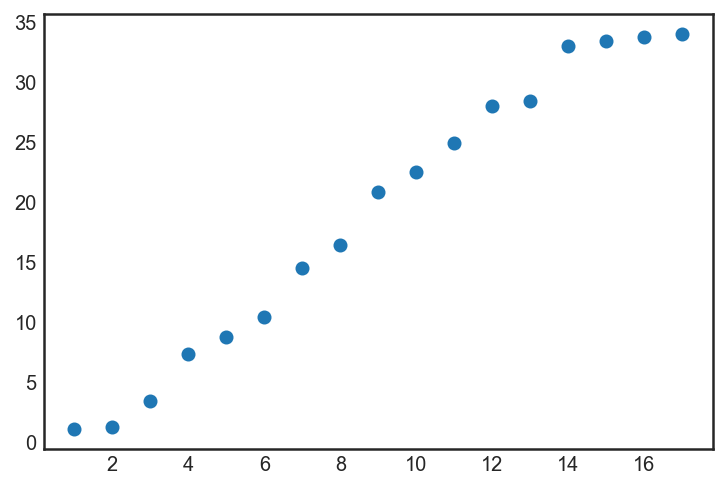

In [95]:
plt.scatter(x=drugs_all['marijuana-use'].rank(), y=drugs_all['marijuana-use'])
None

## Frequency of Marijuana Use

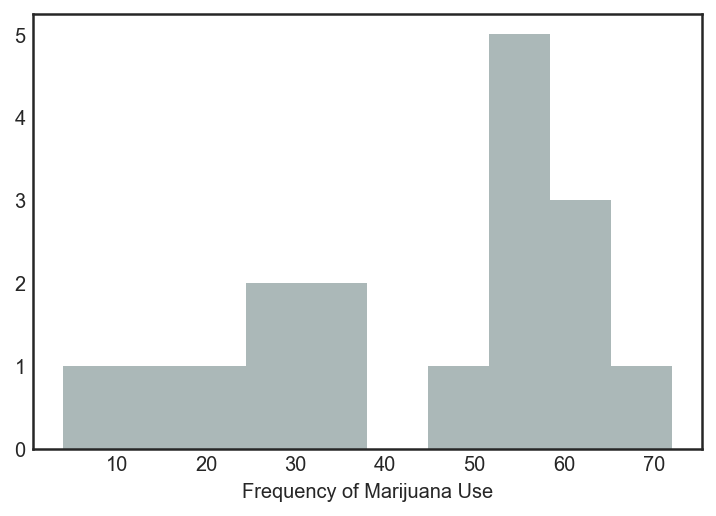

In [96]:
(fig, ax) = plt.subplots()
ax = sns.distplot(drugs_all['marijuana-frequency'], bins=10, kde=False, ax=ax, color='darkslategrey')
ax.set(xlabel='Frequency of Marijuana Use')
None

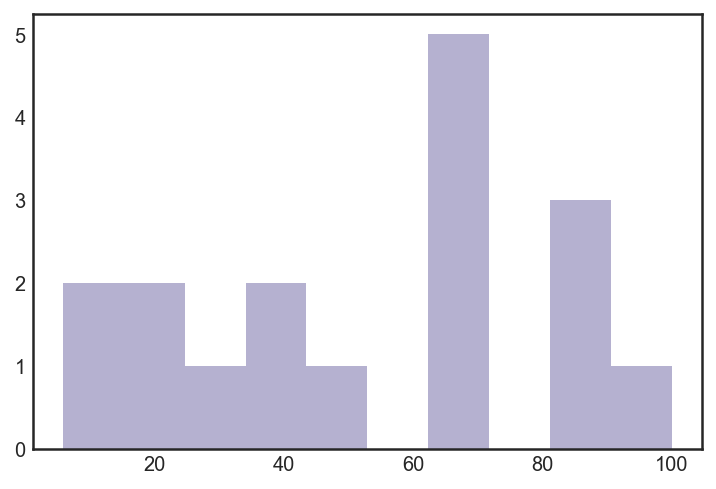

In [97]:
mj_use_freq = [stats.percentileofscore(drugs_all['marijuana-frequency'].values, i) 
                   for i in drugs_all['marijuana-frequency'].values]
sns.distplot(mj_use_freq, kde=False, bins=10, color='darkslateblue')
None

#### Note the use of percentile ranking when looking at the frequency of marijuana use clearly highlights the modal percentile frequency from the remaining bins. What if we don't specify the number of bins?